<a href="https://colab.research.google.com/github/prateekkohli1992/Price_Recommendation_Regression/blob/main/Price_Recommendation_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Client: The client is a ecommerce company where seller can list their products on line by posting photos and other attributes about product.

Problem: New Sellers face problem while pricing their product on platform.

Solution: Give seller an estamate of their price online.

The code below has below parts:

1. EDA
2. Data Cleaning and Feature engineering
2. Modeling
3. observation wise feature importance.



Please import following libaries. Please install if neccessay. you can use !pip install library name



In [ ]:
path_data="/content/drive/MyDrive/ds-take-home-dataset.csv" ## please change as per your google drive. instructions are there in ppt

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotnine import *
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.gridspec as grid
import numpy as np
import re
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import ElasticNet

In [ ]:
import scipy

In [ ]:
import imblearn
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import  Pipeline 
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
import numpy as np 
import pandas as pd 
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import ElasticNet

# Data Read and check

In [ ]:
data=pd.read_csv(path_data)

In [ ]:
data.head()

,id,attr1,attr2,attr3,attr4,attr5,attr6,title,sold_price
0,742122,4,27,149.0,3808.0,1.0,99.0,one teaspoon bandit distressed denim shorts (23),65.0
1,652751,4,3,89.0,1996.0,NaN,1500.0,gucci emily mini guccissima mini red leather bag,600.0
2,228229,4,26,301.0,5194.0,NaN,89.0,steve madden polka dot wedges 8.5 - wi06,12.0
3,645810,4,27,NaN,6335.0,NaN,0.0,crown & ivy navy blue floral print shorts,12.0
4,854374,4,22,302.0,3606.0,2.0,45.0,grey wide leg dress pants,22.0


In [ ]:
data.shape

(1029850, 9)

In [ ]:
data.columns

Index(['id', 'attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'title',
       'sold_price'],
      dtype='object')

In [ ]:
data.describe()

,id,attr1,attr2,attr3,attr4,attr5,attr6,sold_price
count,1.029850e+06,1.029850e+06,1.029850e+06,843080.000000,864417.000000,495664.000000,1.029850e+06,1.029850e+06
mean,4.999636e+05,3.792792e+00,1.611883e+01,170.677981,3026.511901,1.452339,4.572187e+09,1.959587e+02
std,2.886351e+05,5.353355e-01,1.087543e+01,91.907382,1842.932124,0.497728,4.594750e+12,1.440187e+03
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00
25%,2.500282e+05,4.000000e+00,3.000000e+00,89.000000,1453.000000,1.000000,2.700000e+01,1.500000e+01
50%,4.999745e+05,4.000000e+00,1.400000e+01,180.000000,2896.000000,1.000000,1.190000e+02,5.000000e+01
75%,7.499088e+05,4.000000e+00,2.600000e+01,252.000000,4425.000000,2.000000,6.000000e+02,2.790000e+02
max,9.998500e+05,4.000000e+00,3.500000e+01,306.000000,6640.000000,3.000000,4.662595e+15,8.979010e+05


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029850 entries, 0 to 1029849
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1029850 non-null  int64  
 1   attr1       1029850 non-null  int64  
 2   attr2       1029850 non-null  int64  
 3   attr3       843080 non-null   float64
 4   attr4       864417 non-null   float64
 5   attr5       495664 non-null   float64
 6   attr6       1029850 non-null  float64
 7   title       1029761 non-null  object 
 8   sold_price  1029850 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 70.7+ MB


Null value check in percentages. attr3 and attr4 have around 18% missing values and where as attr5 have 51% percent missing value.

title has very low null value.

I will treat them further if needed by my analysis or model choice.

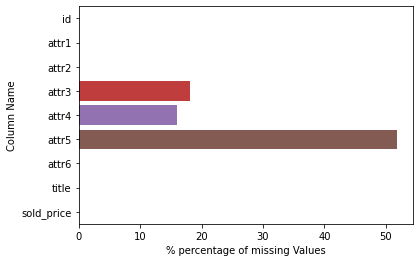

In [ ]:
size=data.shape[0]
plot1 = (data.isnull().sum()/size)*100
plot1 = plot1.reset_index()
plot1.columns=["Column Name", "% percentage of missing Values"]
ax=sns.barplot(x="% percentage of missing Values",y="Column Name",data=plot1)

In [ ]:
data.isnull().sum()/data.shape[0]*100

id             0.000000
attr1          0.000000
attr2          0.000000
attr3         18.135651
attr4         16.063796
attr5         51.870272
attr6          0.000000
title          0.008642
sold_price     0.000000
dtype: float64

About 2% if sold_price is at zero. are they free products? should be investigated later.

> Indented block

> Indented block





In [ ]:
data[data["sold_price"]==0].shape[0]/data.shape[0]*100

1.9420303927756468

# **Univariate Analysis**
Below is my custom function to do univaraite analysis

In [ ]:
def plot_univarite_num(data_numeric,col,bins=None,bw=True,transformation=None):
    col_data = data_numeric[col]
    if(transformation):
        col_data = transformation(data_numeric[col])
    fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
    sns.boxplot(col_data,ax=ax[0])
    
    if(bins):
        if(not bw):
            sns.distplot(col_data,bins=bins,ax=ax[1],kde=bw)
        else:
            sns.distplot(col_data,bins=bins,ax=ax[1])
    else:
        if(not bw):
            sns.distplot(col_data,ax=ax[1],kde=bw)
        else:
            sns.distplot(col_data,ax=ax[1])
    plt.show()

There are duplicate rows in data. I will delete them.

In [ ]:
sum(data.duplicated())

10203

There are 10,203 records that are duplicated. these are dropped

In [ ]:
data = data.drop_duplicates(keep='first')

In [ ]:
data.shape

(1019647, 9)

Checking attr1 : 
Seems to be categorical or descrete. different encoding should be tried in bivariate analysis and modeling phases. the varaible is more concentrated at 4

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


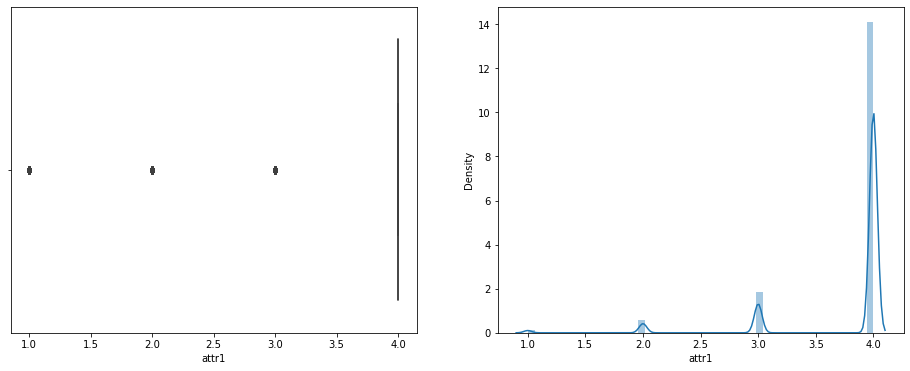

In [ ]:
plot_univarite_num(data,"attr1")

In [ ]:
data["attr1"].value_counts()

4    861881
3    113106
2     35812
1      8848
Name: attr1, dtype: int64

Checking attr2. seems to be descrete variable. No null values.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


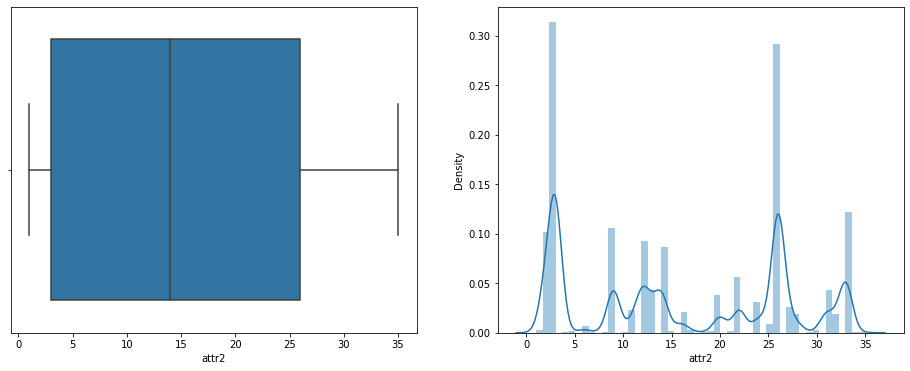

In [ ]:
plot_univarite_num(data,"attr2")

In [ ]:
data["attr2"].value_counts()

3     217480
26    201977
33     84257
9      73611
2      70245
12     64354
14     60117
22     38943
31     30289
13     30128
20     26319
24     21748
27     17854
11     16217
16     14287
32     13030
28     13026
25      6291
6       4793
17      2062
1       1823
30      1621
19      1313
21      1117
15      1025
5        999
34       858
10       753
7        668
8        661
35       586
18       572
29       263
4        235
23       125
Name: attr2, dtype: int64

Checking attribute 3. 18% missing values. seems to be descrete. I will use imputation to treat null values later or I will group this varaible in bins and make a new category for null value. To be decided later according to model used.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


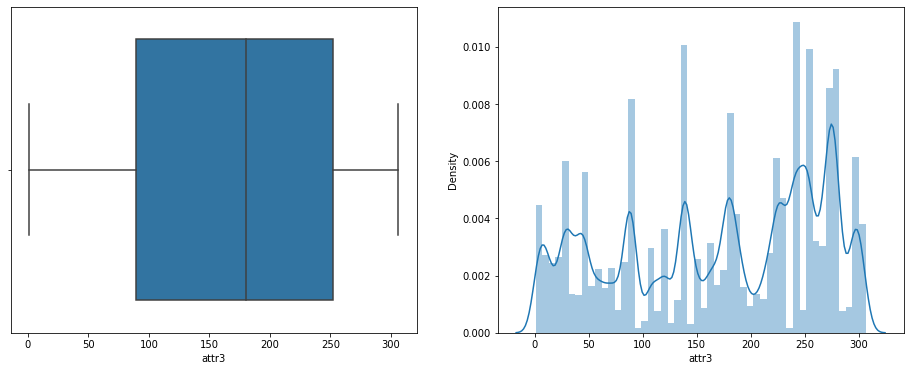

In [ ]:
plot_univarite_num(data,"attr3")

Checking attribute 4. 16% Missing Values same inference as 3

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


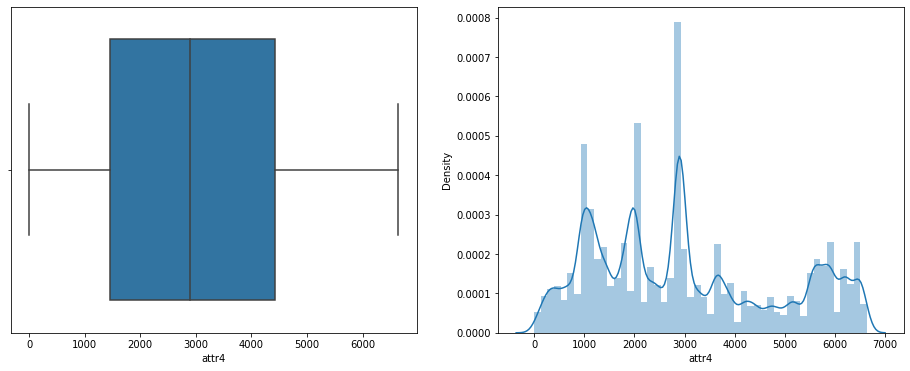

In [ ]:
plot_univarite_num(data,"attr4")

Checking attribute 5. 51% missing values. I can treat this varaible as categorical and null values will be another category="Unkonwn". value 3 is extermely less. I will drop the obsveration with this value or I will group it under one of the groups later (acctually grouping caused problem in linear regression and I went with dropping it)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


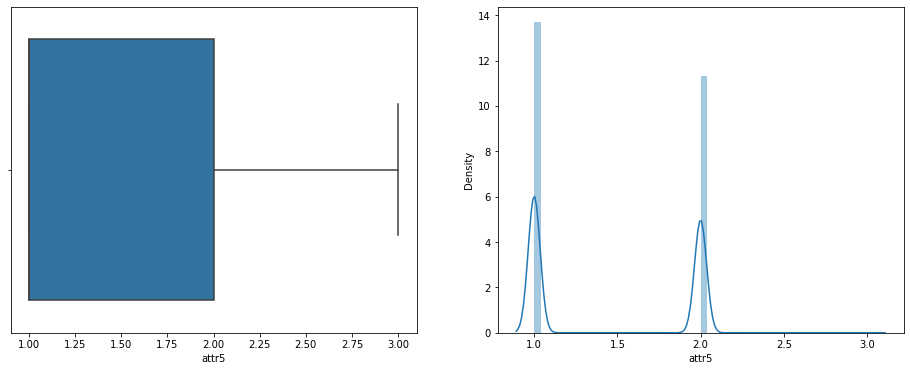

In [ ]:
plot_univarite_num(data,"attr5")

In [ ]:
data["attr5"].fillna("unkonwn").value_counts()

unkonwn    528867
1.0        268780
2.0        221999
3.0             1
Name: attr5, dtype: int64

checking attribute 6. There is an outlier at point. Masking all inference. 

After taking log transformation it reveal a lot.

There are lot of points at zero and then there is a bimodal distribution centered at 5.

I will analyse this variable further, during bivariate analysis. This varaible might be grouped to avoid the problem of outliers as even after taking log we have some high values

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


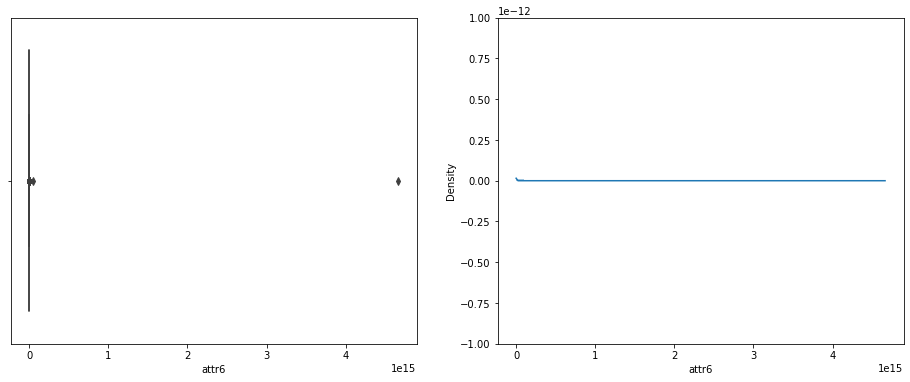

In [ ]:
plot_univarite_num(data,"attr6")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


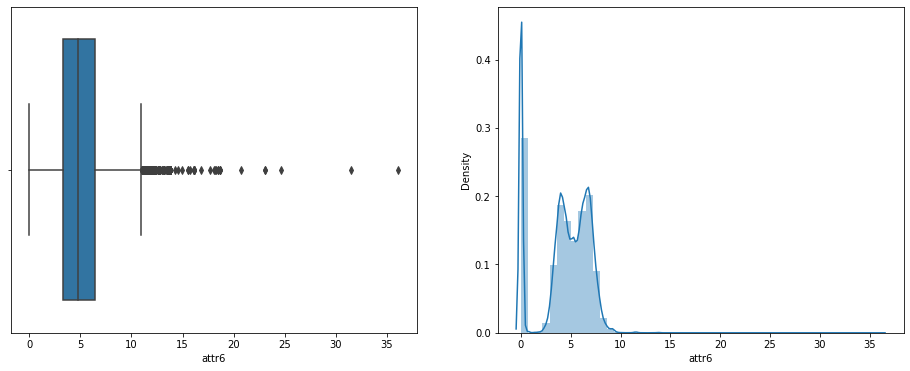

In [ ]:
plot_univarite_num(data,"attr6",transformation=lambda x:np.log(x+1))

Cheking Title. if time permits this varaible can be used to create cluster which can help in identify product group, or we can extract popular brand names from this.

In [ ]:
data["title"].value_counts()

gucci belt                                     804
louis vuitton neverfull mm                     792
louis vuitton                                  750
christian louboutin                            700
shoes                                          635
                                              ... 
ferragamo mens belt blue with silver buckle      1
nwt kate spade hat and glove set                 1
louis vuitton monogram ellipse handbag           1
nwt rag and bone walker lambskin booties         1
authentic christian louboutin (red bottoms)      1
Name: title, Length: 840460, dtype: int64

In [ ]:
text = " ".join(title for title in data["title"].fillna("unknown"))

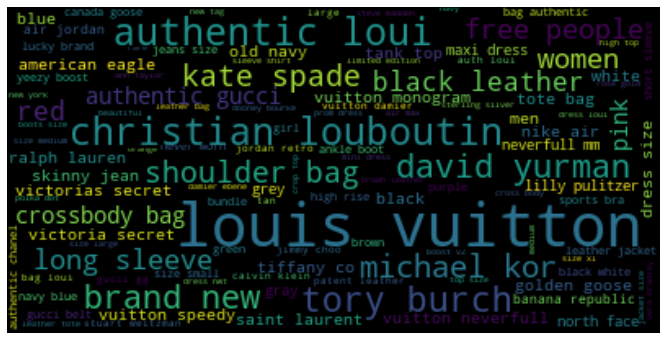

In [ ]:
wordcloud = WordCloud().generate(text)

# Display the generated image:
fig = plt.figure(figsize=(20, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Checking sold_price. Higly skewed. It must be transformed in order to analyse it in bivaraite analysis with other variables. In modeling, I will try models with and without transformation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


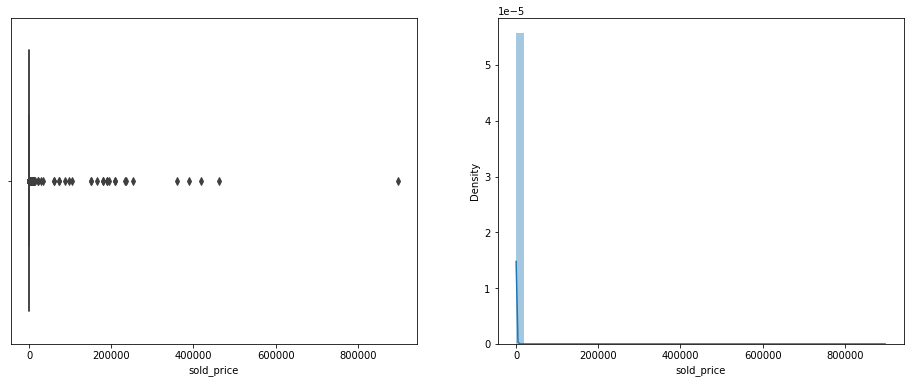

In [ ]:
plot_univarite_num(data,"sold_price")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


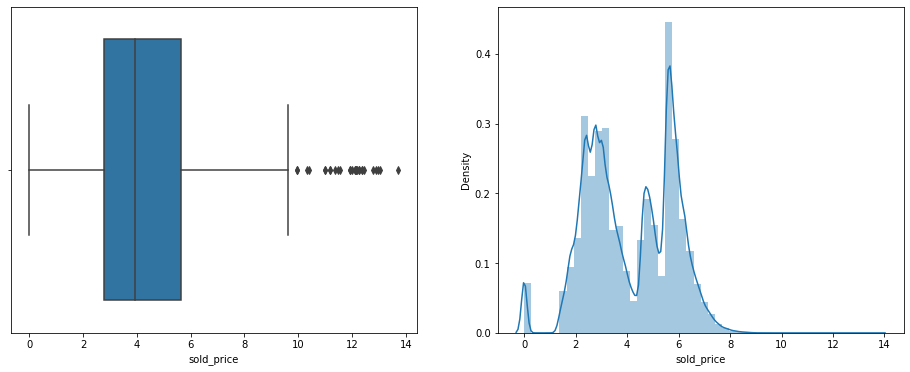

In [ ]:
plot_univarite_num(data,"sold_price",transformation=lambda x:np.log(x+1))

Checking how many obs varation we have in different groups. They are dominated by 0 to 50 and 100 to 150. Are these value also depend on time? I will check with ID varaible as it shows the recency of the orders.

In [ ]:
pd.cut(data["sold_price"],[0,50,100,500,1000,np.float('inf')]).value_counts().reset_index().sort_values("index")

,index,sold_price
0,"(0.0, 50.0]",490805
3,"(50.0, 100.0]",61240
1,"(100.0, 500.0]",362205
2,"(500.0, 1000.0]",64494
4,"(1000.0, inf]",21107


In [ ]:
data.columns

Index(['id', 'attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'title',
       'sold_price'],
      dtype='object')

# Bivariate analysis.

I am also taking of sold_price and attr6 as without these they were not revealing much

In [ ]:
data["trans_log_attr6"]=data["attr6"].apply(lambda x:np.log(x+1))
data["trans_log_sold_price"]=data["sold_price"].apply(lambda x:np.log(x+1))

Scatter plot of different varaibles and there correlations. Correlation are also checked with non tranformed version of sold_price.

All correlations are low. even with dependent varaible.

There seems to be no pair wise multicolinearity. Though attr2 and attr6 (log tranforemed have relatively high colinearity but not very high)

attr2 and attr6 have relatively high corelation with sold_price

**pearson corelation only shows strength of linear relations ship. More will explored in bivaraite analysis below.

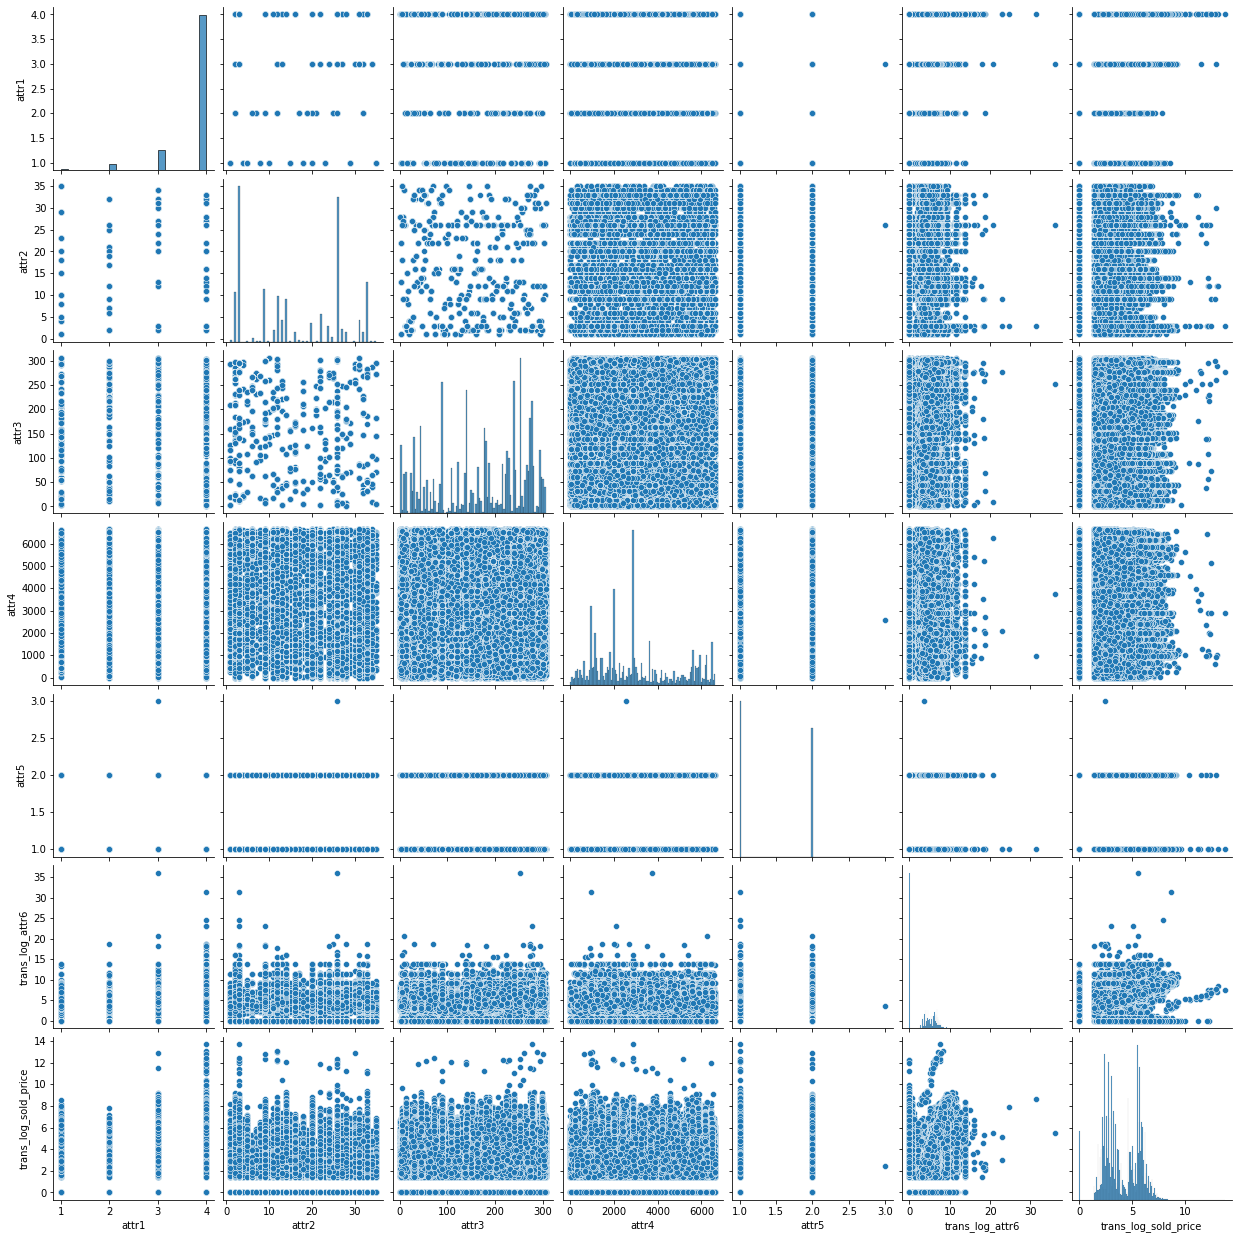

In [ ]:
df = data.loc[:,['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'trans_log_attr6','trans_log_sold_price']]
sns.pairplot(df)

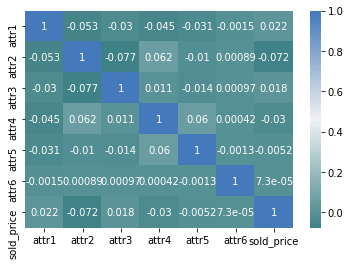

In [ ]:
df = data.loc[:,['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6','sold_price']]
ax=sns.heatmap(df.corr(),cmap=sns.diverging_palette(200,250,as_cmap=True,center="light"),annot=True)

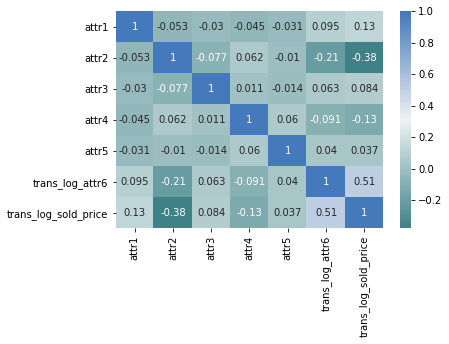

In [ ]:
df = data.loc[:,['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'trans_log_attr6','trans_log_sold_price']]
ax=sns.heatmap(df.corr(),cmap=sns.diverging_palette(200,250,as_cmap=True,center="light"),annot=True)

attr1 values 1&2 are considerably different from 3&4 in terms log sold price. Grouping of 1&2 and 2&4 can be explored if needed.

In [ ]:
data["attr1"].value_counts()

4    861881
3    113106
2     35812
1      8848
Name: attr1, dtype: int64

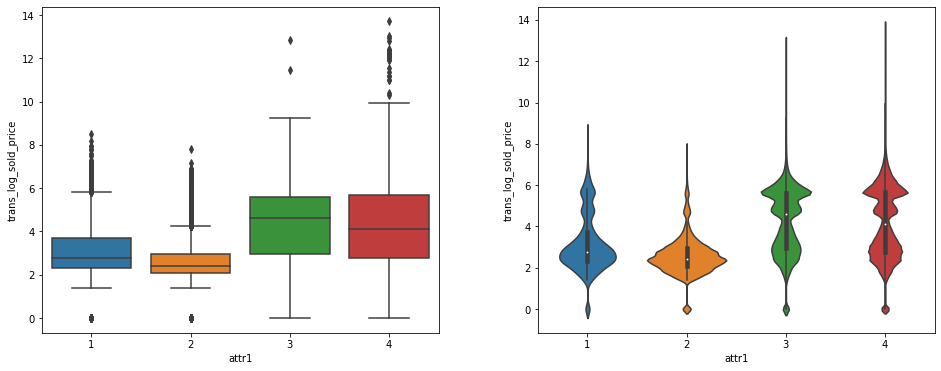

KruskalResult(statistic=39603.20800546822, pvalue=0.0)

In [ ]:
fig = plt.figure(figsize=(16, 6))
gs = grid.GridSpec(1, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.boxplot(data = data, x='attr1', y='trans_log_sold_price',ax=ax0)
sns.violinplot(data = data, x='attr1', y='trans_log_sold_price',ax=ax1)
plt.show()
scipy.stats.kruskal(data[data['attr1']==1]['trans_log_sold_price'], data[data['attr1']==2]['trans_log_sold_price'],data[data['attr1']==3]['trans_log_sold_price'],data[data['attr1']==4]['trans_log_sold_price'],nan_policy='omit')

Some non linear pattern is observed between log sold_price and attr2

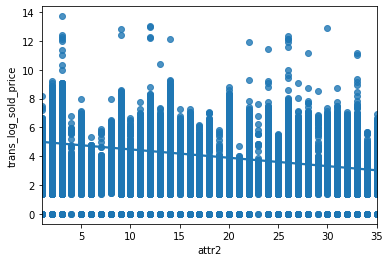

In [ ]:
ax = sns.regplot(x="attr2", y="trans_log_sold_price", data=data)

Checking how grouping of attrb2 behaves with log_sold_price

> Indented block



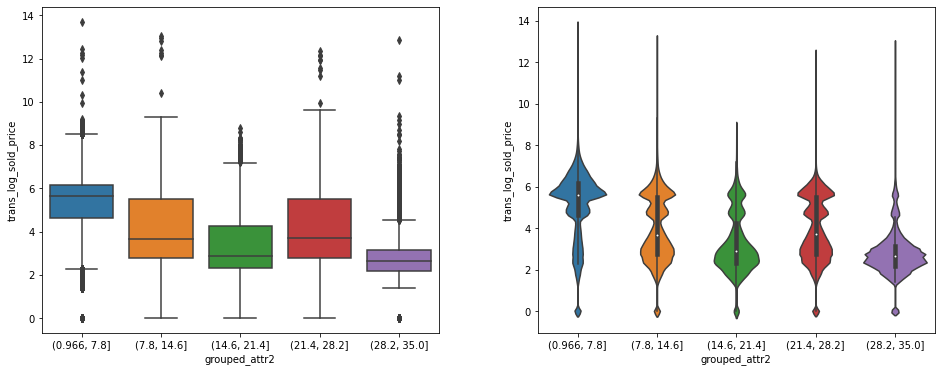

In [ ]:
data["grouped_attr2"]=pd.cut(data["attr2"],5)
fig = plt.figure(figsize=(16, 6))
gs = grid.GridSpec(1, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.boxplot(data = data, x='grouped_attr2', y='trans_log_sold_price',ax=ax0)
sns.violinplot(data = data, x='grouped_attr2', y='trans_log_sold_price',ax=ax1)
plt.show()

It seems there is no strong relationship (bivariate) between attr3 and log_price. Even grouping of this varaible doesnt reveal much. But median for log price is higher for group 204 to 306

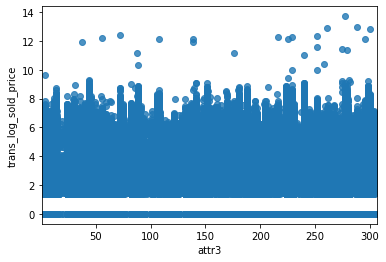

In [ ]:
ax = sns.regplot(x="attr3", y="trans_log_sold_price", data=data)

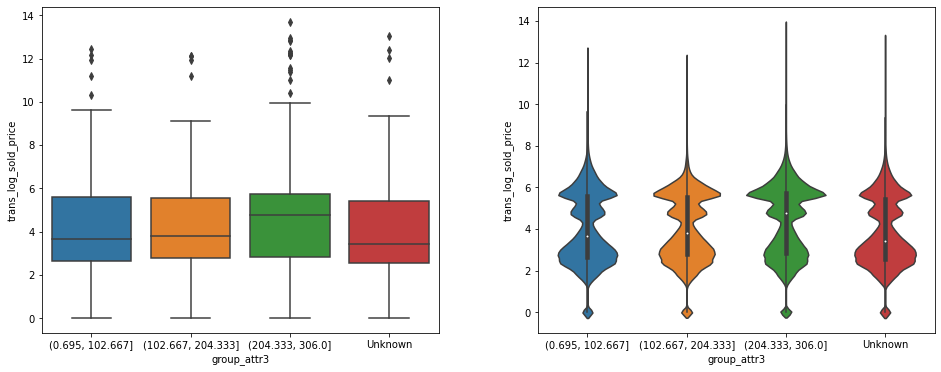

In [ ]:
data["group_attr3"]=pd.cut(data["attr3"],3)
data["group_attr3"]=data["group_attr3"].cat.add_categories('Unknown')
data["group_attr3"]=data["group_attr3"].fillna('Unknown')
fig = plt.figure(figsize=(16, 6))
gs = grid.GridSpec(1, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
sns.boxplot(data = data, x='group_attr3', y='trans_log_sold_price',ax=ax0)
sns.violinplot(data = data, x='group_attr3', y='trans_log_sold_price',ax=ax1)
plt.show()

This is also behaving on similar lines as of attr3, But grouping reveal lower end groups have higher median log sold price

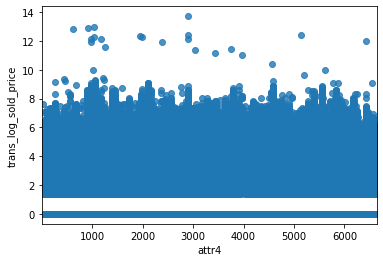

In [ ]:
ax = sns.regplot(x="attr4", y="trans_log_sold_price", data=data)

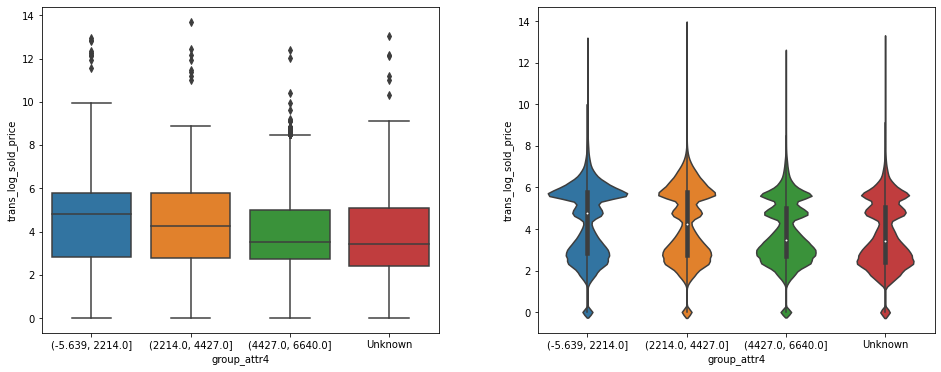

In [ ]:
data["group_attr4"]=pd.cut(data["attr4"],3)
data["group_attr4"]=data["group_attr4"].cat.add_categories('Unknown')
data["group_attr4"]=data["group_attr4"].fillna('Unknown')
fig = plt.figure(figsize=(16, 6))
gs = grid.GridSpec(1, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
sns.boxplot(data = data, x='group_attr4', y='trans_log_sold_price',ax=ax0)
sns.violinplot(data = data, x='group_attr4', y='trans_log_sold_price',ax=ax1)
plt.show()

This variable as well dont have much difference in log_price .

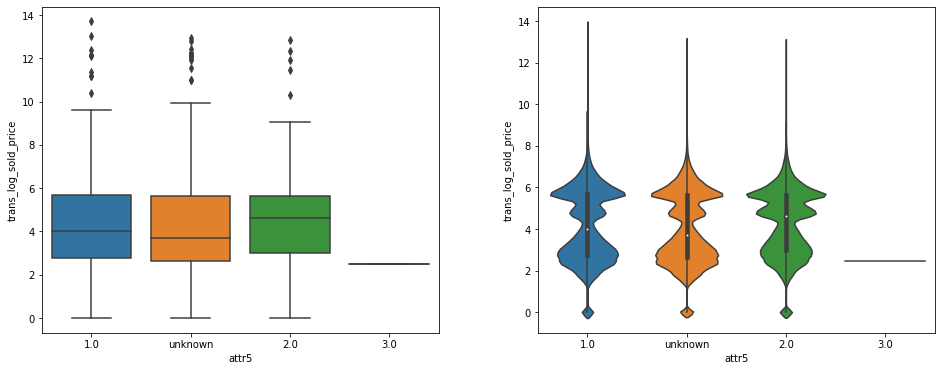

In [ ]:
fig = plt.figure(figsize=(16, 6))
gs = grid.GridSpec(1, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
data=data.fillna({"attr5":"unknown"})
sns.boxplot(data = data, x='attr5', y='trans_log_sold_price',ax=ax0)
sns.violinplot(data = data, x='attr5', y='trans_log_sold_price',ax=ax1)
plt.show()

There seems to be outliers here impacting relation between attr5 (log) and log sold price. Grouping this variable might be helpful to deal with these ouliers

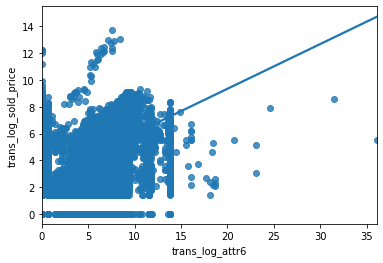

In [ ]:
ax = sns.regplot(x="trans_log_attr6", y="trans_log_sold_price", data=data)

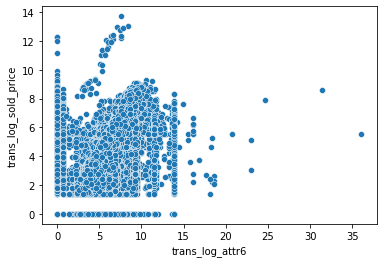

In [ ]:
ax = sns.scatterplot(x="trans_log_attr6", y="trans_log_sold_price", data=data)

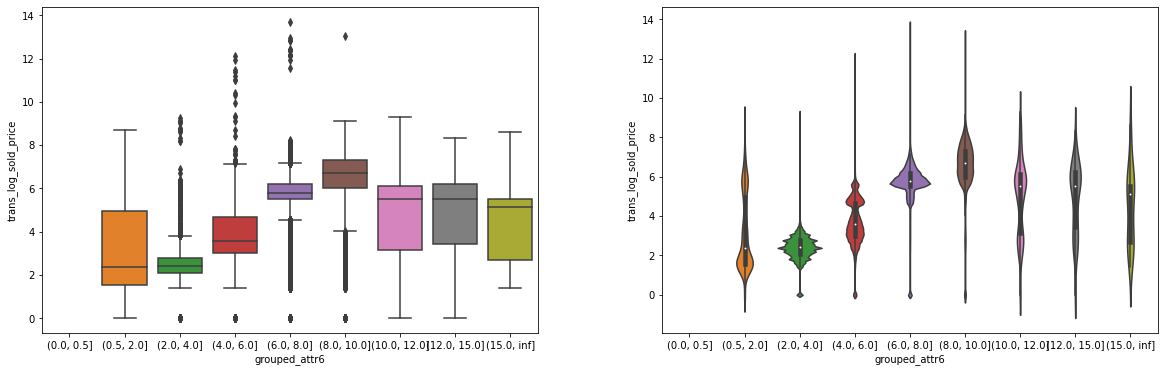

In [ ]:
data["grouped_attr6"]=pd.cut(data["trans_log_attr6"],[0,0.5,2,4,6,8,10,12,15,float('inf')])
fig = plt.figure(figsize=(20, 6))
gs = grid.GridSpec(1, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.boxplot(data = data, x='grouped_attr6', y='trans_log_sold_price',ax=ax0)
sns.violinplot(data = data, x='grouped_attr6', y='trans_log_sold_price',ax=ax1)
plt.show()

# Below are the heatmaps which I use to do pair wise analysis of varaibles and how they vary with log sold price

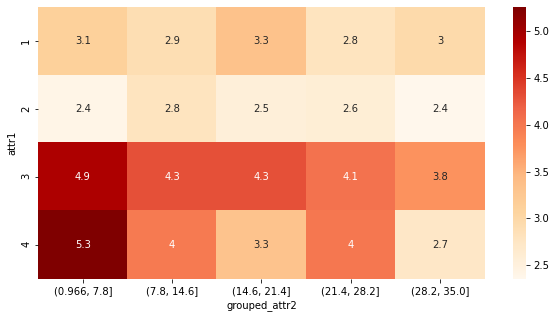

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax=sns.heatmap(pd.pivot_table(data,values="trans_log_sold_price",index="attr1",columns="grouped_attr2",aggfunc="mean"),annot=True,cmap="OrRd")
ax.set(xlabel='grouped_attr2', ylabel="attr1")
plt.show()

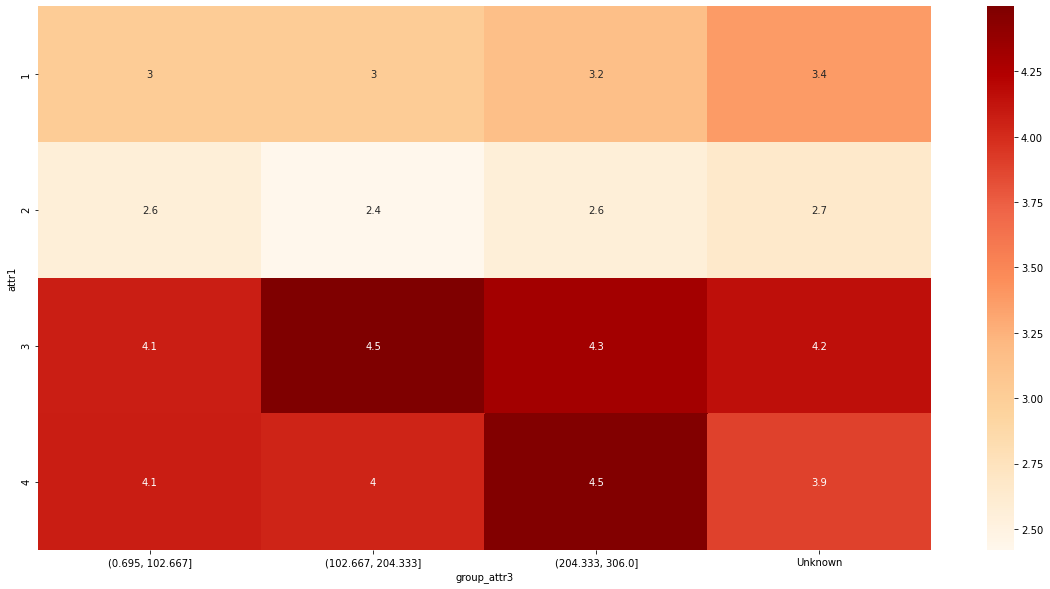

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax=sns.heatmap(pd.pivot_table(data,values="trans_log_sold_price",index="attr1",columns="group_attr3",aggfunc="mean"),annot=True,cmap="OrRd")
ax.set(xlabel='group_attr3', ylabel="attr1")
plt.show()

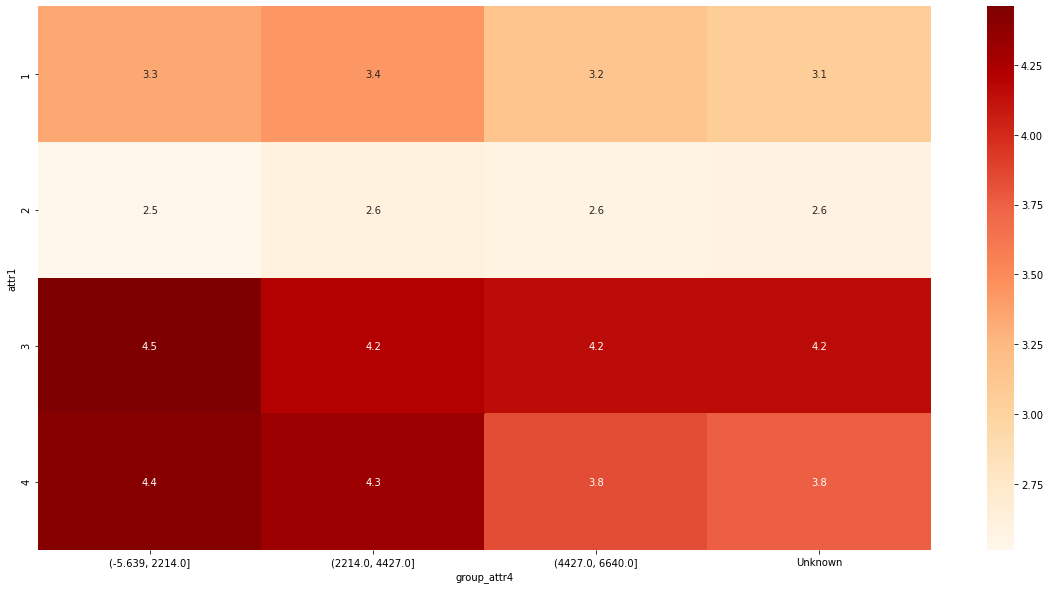

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax=sns.heatmap(pd.pivot_table(data,values="trans_log_sold_price",index="attr1",columns="group_attr4",aggfunc="mean"),annot=True,cmap="OrRd")
ax.set(xlabel='group_attr4', ylabel="attr1")
plt.show()

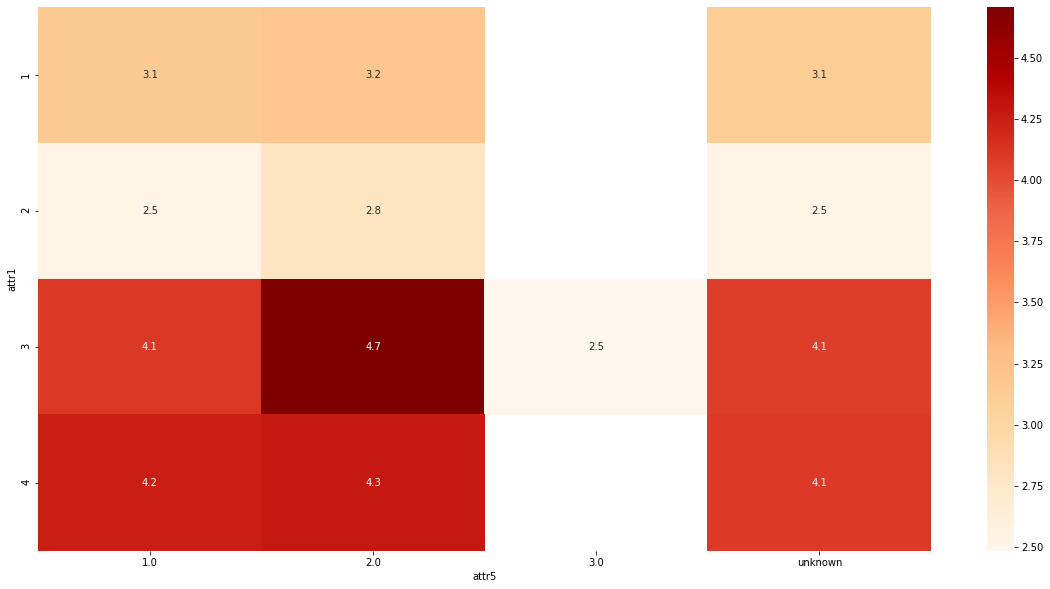

In [ ]:
fig = plt.figure(figsize=(20, 10))
data["group_attr4"]=pd.cut(data["attr4"],20)
ax=sns.heatmap(pd.pivot_table(data,values="trans_log_sold_price",index="attr1",columns="attr5",aggfunc="mean"),annot=True,cmap="OrRd")
ax.set(xlabel='attr5', ylabel="attr1")
plt.show()

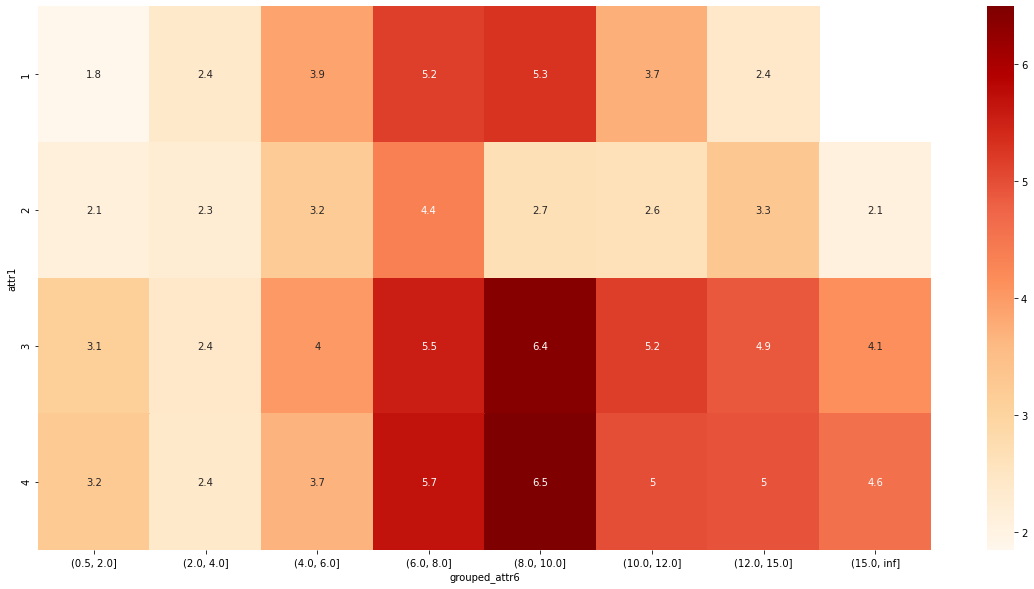

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax=sns.heatmap(pd.pivot_table(data,values="trans_log_sold_price",index="attr1",columns="grouped_attr6",aggfunc="mean"),annot=True,cmap="OrRd")
ax.set(xlabel='grouped_attr6', ylabel="attr1")
plt.show()

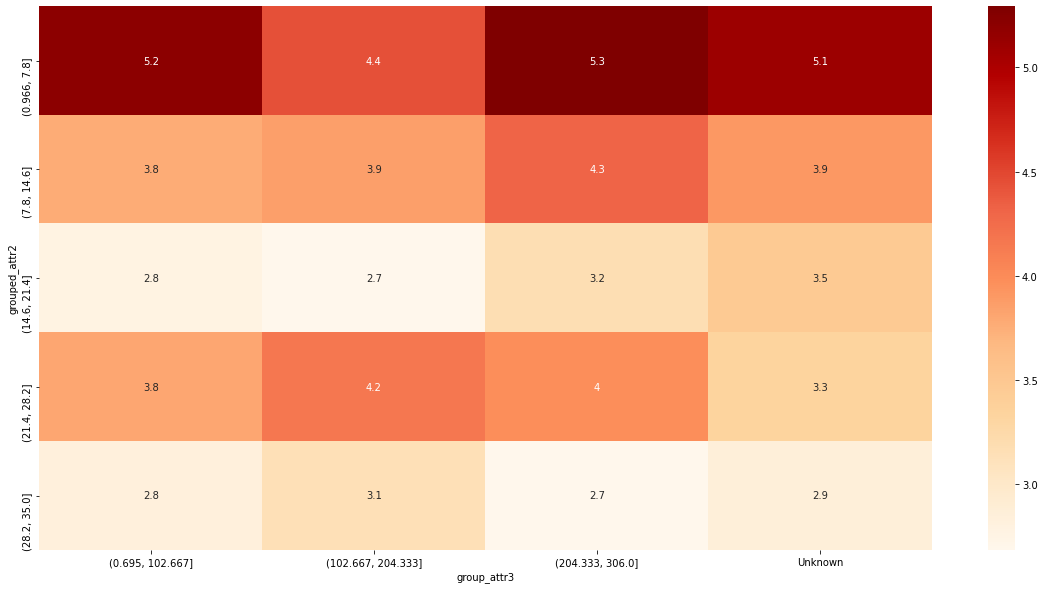

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax=sns.heatmap(pd.pivot_table(data,values="trans_log_sold_price",index="grouped_attr2",columns="group_attr3",aggfunc="mean"),annot=True,cmap="OrRd")
ax.set(xlabel='group_attr3', ylabel="grouped_attr2")
plt.show()

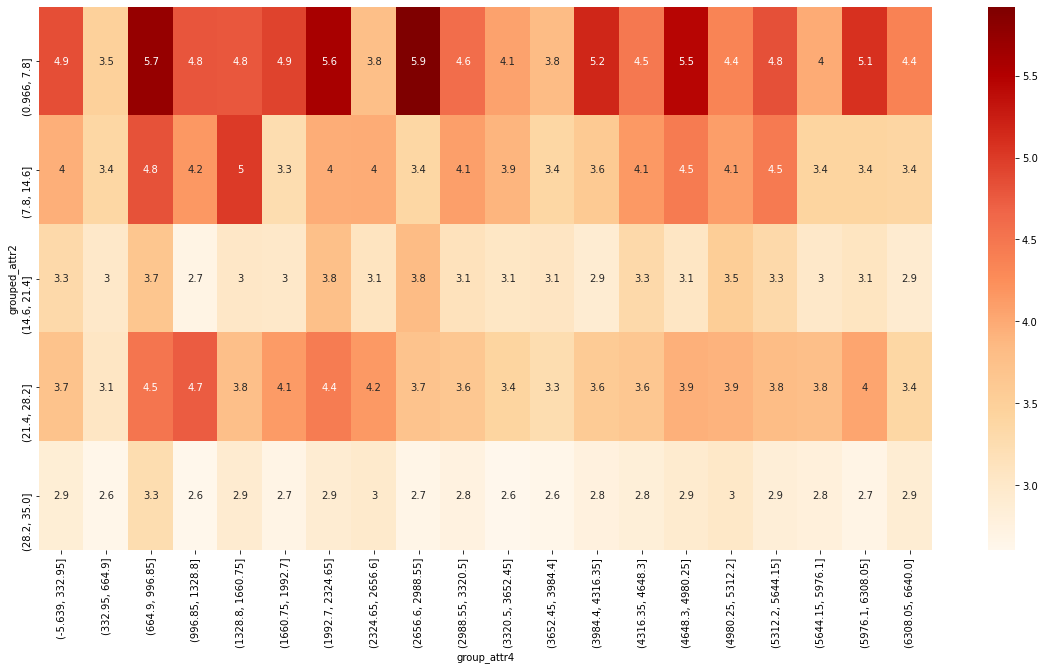

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax=sns.heatmap(pd.pivot_table(data,values="trans_log_sold_price",index="grouped_attr2",columns="group_attr4",aggfunc="mean"),annot=True,cmap="OrRd")
ax.set(xlabel='group_attr4', ylabel="grouped_attr2")
plt.show()

In [ ]:
data = data.loc[data["attr5"]!=3,:]

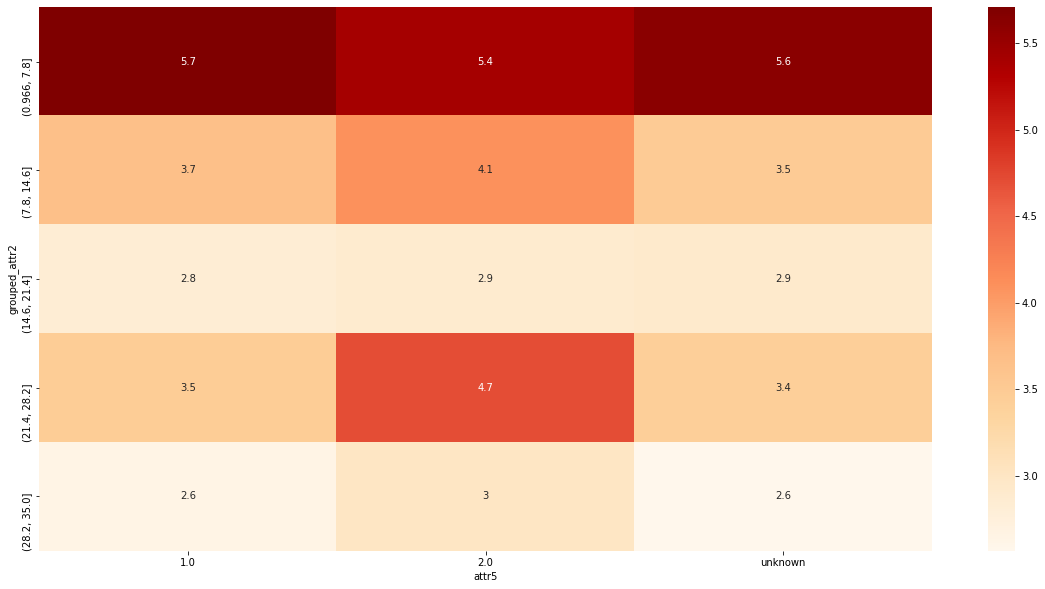

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax=sns.heatmap(pd.pivot_table(data,values="trans_log_sold_price",index="grouped_attr2",columns="attr5",aggfunc="median"),annot=True,cmap="OrRd")
ax.set(xlabel='attr5', ylabel="grouped_attr2")
plt.show()

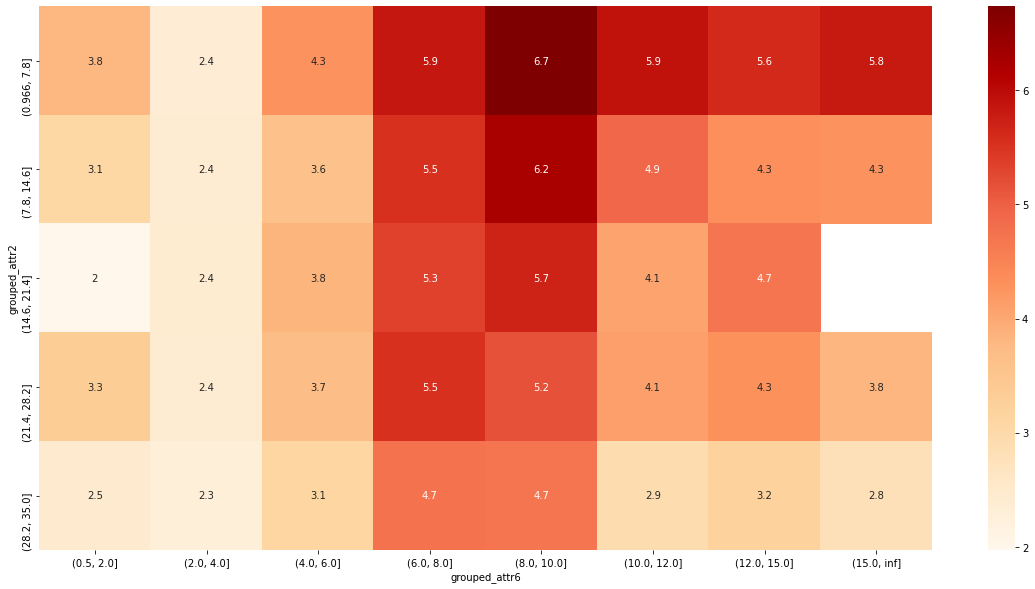

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax=sns.heatmap(pd.pivot_table(data,values="trans_log_sold_price",index="grouped_attr2",columns="grouped_attr6",aggfunc="mean"),annot=True,cmap="OrRd")
ax.set(xlabel='grouped_attr6', ylabel="grouped_attr2")
plt.show()

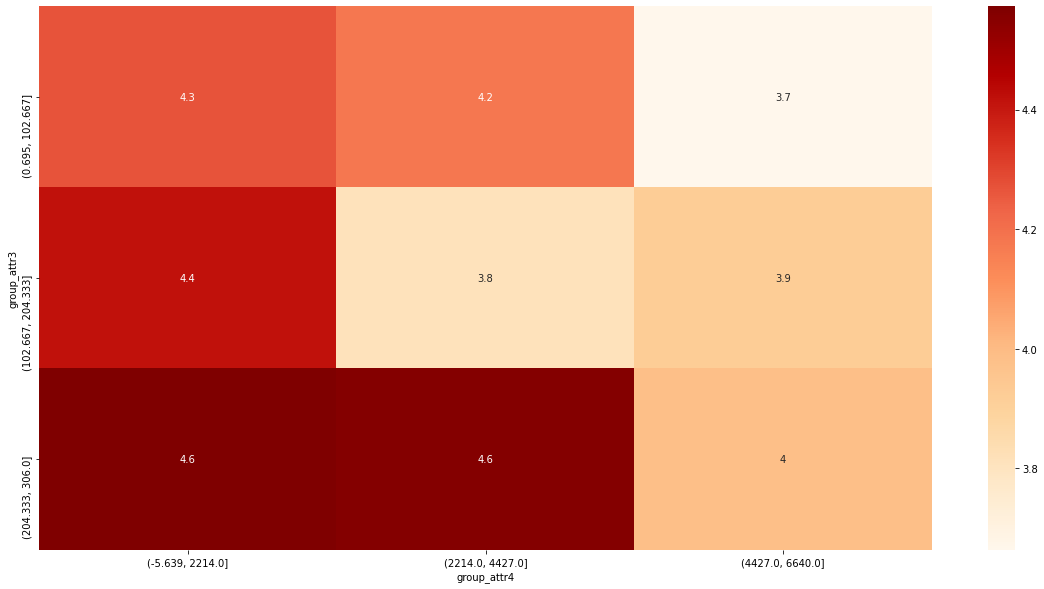

In [ ]:
fig = plt.figure(figsize=(20, 10))
data["group_attr4"]=pd.cut(data["attr4"],3)
data["group_attr3"]=pd.cut(data["attr3"],3)
ax=sns.heatmap(pd.pivot_table(data,values="trans_log_sold_price",index="group_attr3",columns="group_attr4",aggfunc="mean"),annot=True,cmap="OrRd")
ax.set(xlabel='group_attr4', ylabel="group_attr3")
plt.show()

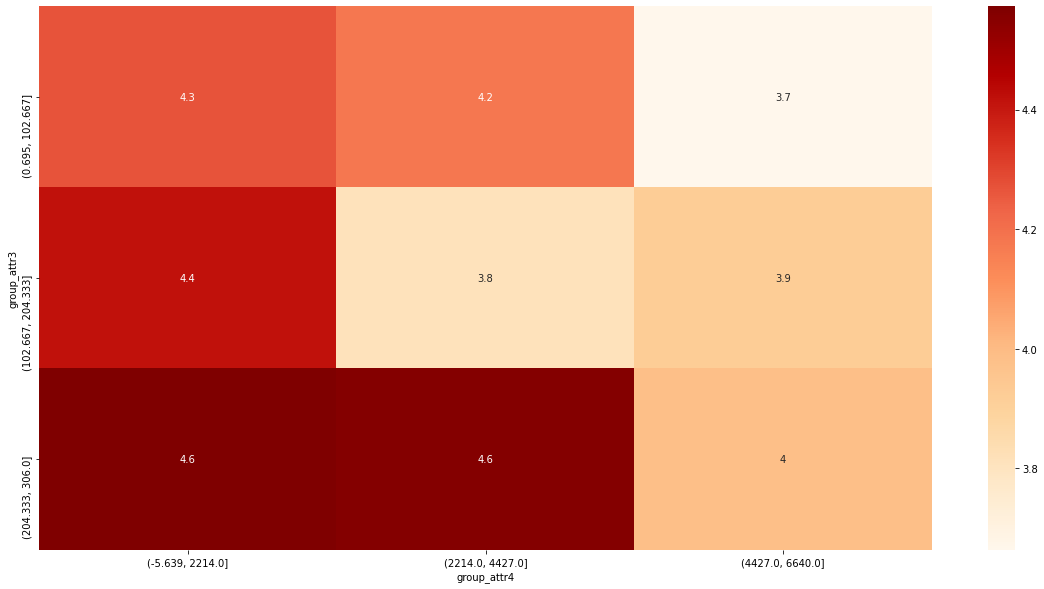

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax=sns.heatmap(pd.pivot_table(data,values="trans_log_sold_price",index="group_attr3",columns="group_attr4",aggfunc="mean"),annot=True,cmap="OrRd")
ax.set(xlabel='group_attr4', ylabel="group_attr3")
plt.show()

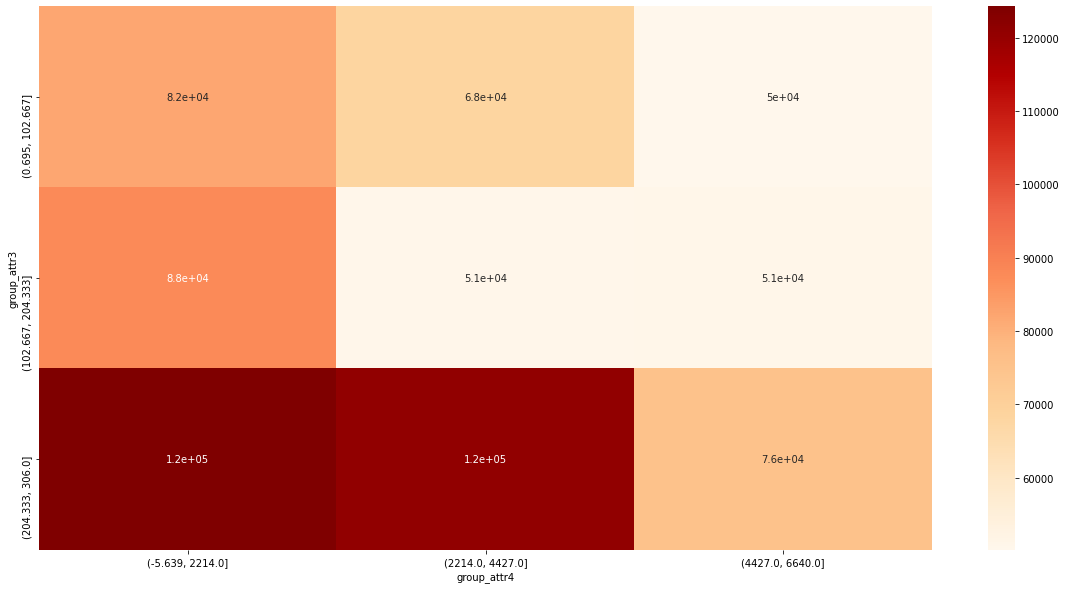

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax=sns.heatmap(pd.pivot_table(data,values="trans_log_sold_price",index="group_attr3",columns="group_attr4",aggfunc="count"),annot=True,cmap="OrRd")
ax.set(xlabel='group_attr4', ylabel="group_attr3")
plt.show()

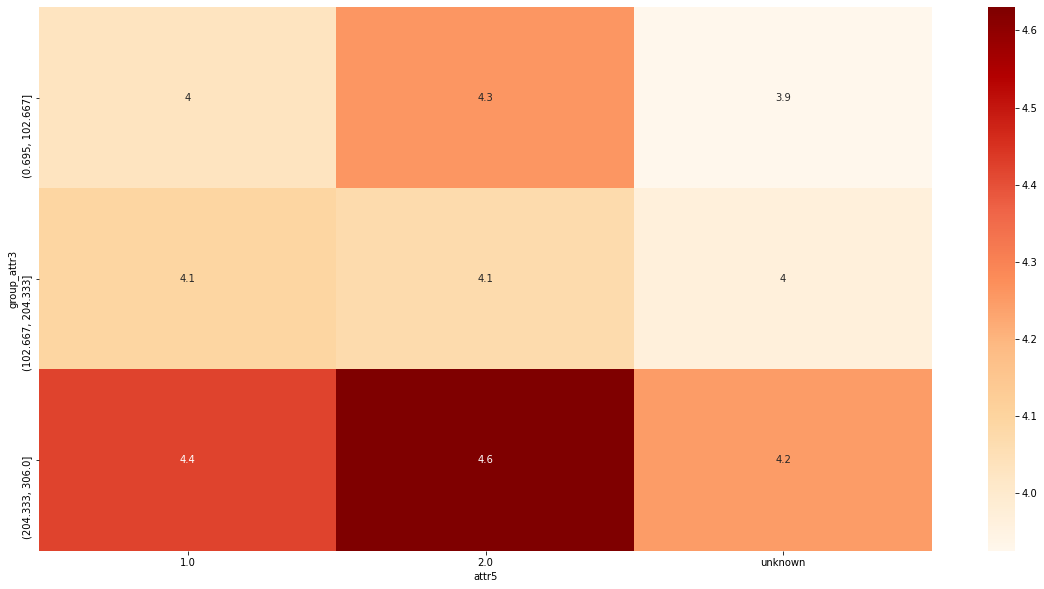

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax=sns.heatmap(pd.pivot_table(data,values="trans_log_sold_price",index="group_attr3",columns="attr5",aggfunc="mean"),annot=True,cmap="OrRd")
ax.set(xlabel='attr5', ylabel="group_attr3")
plt.show()

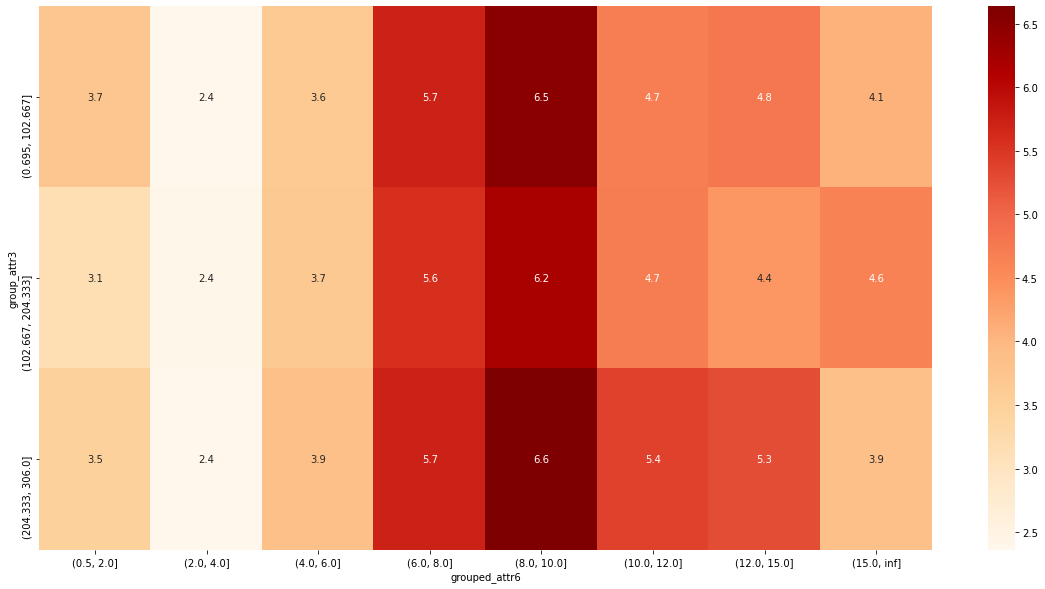

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax=sns.heatmap(pd.pivot_table(data,values="trans_log_sold_price",index="group_attr3",columns="grouped_attr6",aggfunc="mean"),annot=True,cmap="OrRd")
ax.set(xlabel='grouped_attr6', ylabel="group_attr3")
plt.show()

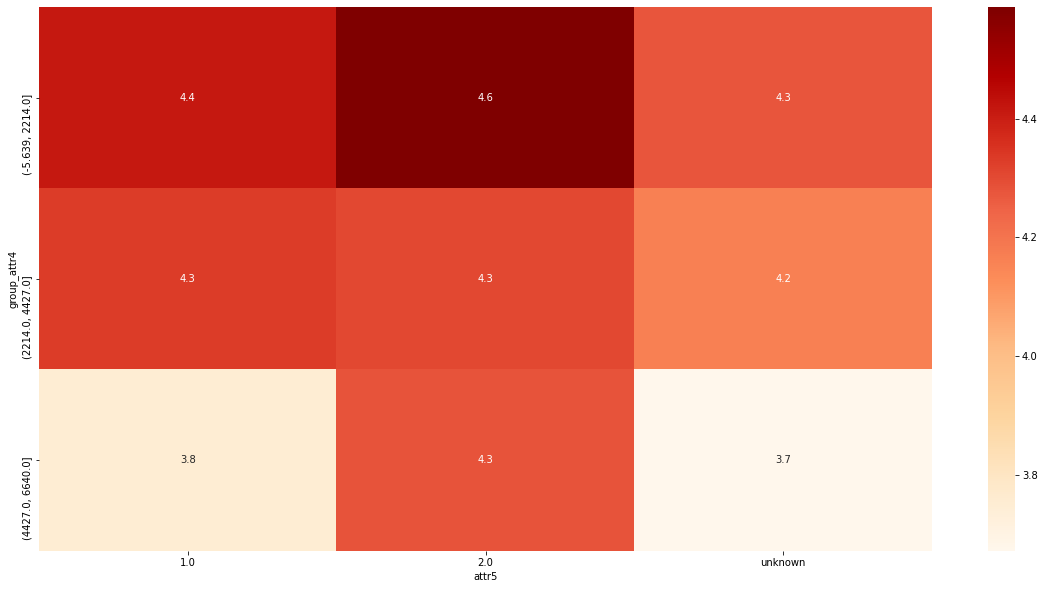

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax=sns.heatmap(pd.pivot_table(data,values="trans_log_sold_price",index="group_attr4",columns="attr5",aggfunc="mean"),annot=True,cmap="OrRd")
ax.set(xlabel='attr5', ylabel="group_attr4")
plt.show()

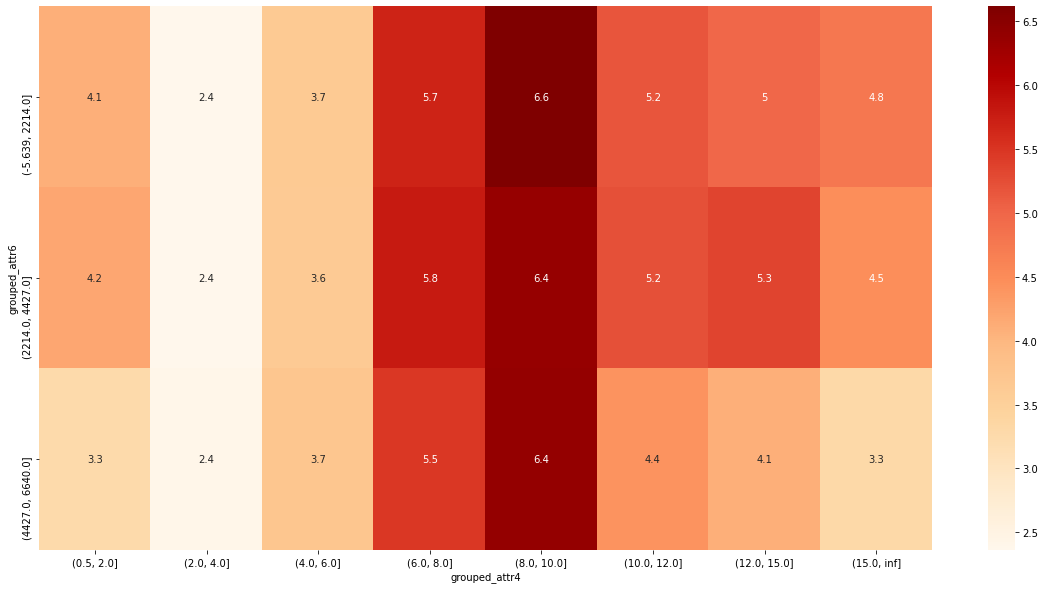

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax=sns.heatmap(pd.pivot_table(data,values="trans_log_sold_price",index="group_attr4",columns="grouped_attr6",aggfunc="mean"),annot=True,cmap="OrRd")
ax.set(xlabel='grouped_attr4', ylabel="grouped_attr6")
plt.show()

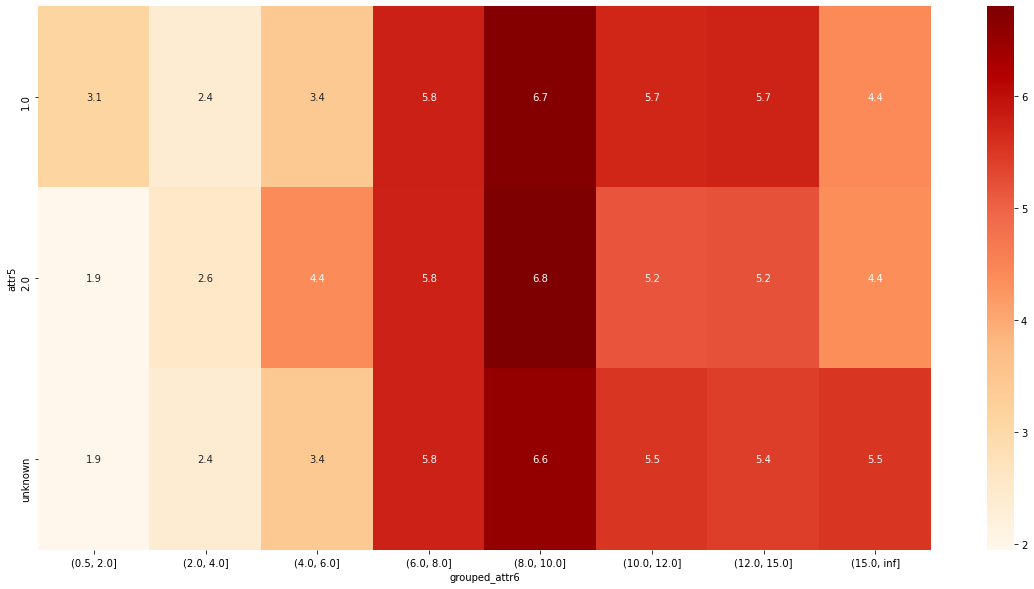

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax=sns.heatmap(pd.pivot_table(data,values="trans_log_sold_price",index="attr5",columns="grouped_attr6",aggfunc="median"),annot=True,cmap="OrRd")
ax.set(xlabel='grouped_attr6', ylabel="attr5")
plt.show()

# Analysing Clusters in data (without dependent varaible log_sold_price). NO meaningful clusters are found

In [ ]:
data.columns

Index(['id', 'attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'title',
       'sold_price', 'trans_log_attr6', 'trans_log_sold_price',
       'grouped_attr2', 'group_attr3', 'group_attr4', 'grouped_attr6'],
      dtype='object')

In [ ]:
data["mean_impute_attr3"]=data["attr3"].fillna(data["attr3"].mean())
data["mean_impute_attr4"]=data["attr4"].fillna(data["attr4"].mean())

In [ ]:
data_clutser=data[["attr1","attr2","mean_impute_attr3","mean_impute_attr4","attr5","trans_log_attr6"]].copy()

In [ ]:
data_clutser.loc[data_clutser["attr5"]=='unknown','attr5']=3

In [ ]:
scaler = MinMaxScaler()
data_clutser=scaler.fit_transform(data_clutser)

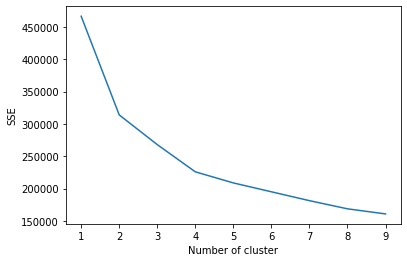

In [ ]:
data_clutser=pd.DataFrame(data_clutser)

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_clutser)
    data_clutser["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=1000).fit(data_clutser)

In [ ]:
data["cluster"]=kmeans.labels_

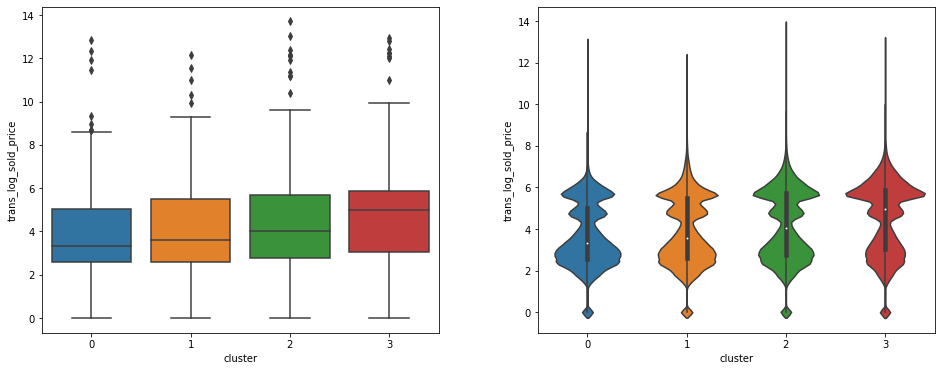

In [ ]:
fig = plt.figure(figsize=(16, 6))
gs = grid.GridSpec(1, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.boxplot(data = data, x='cluster', y='trans_log_sold_price',ax=ax0)
sns.violinplot(data = data, x='cluster', y='trans_log_sold_price',ax=ax1)
plt.show()

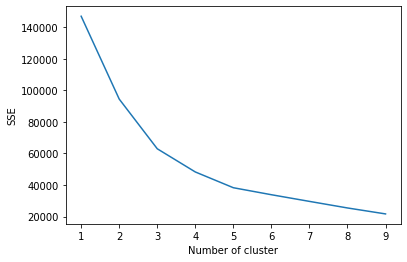

In [ ]:
data_clutser=data[["mean_impute_attr3","mean_impute_attr4","trans_log_attr6"]].copy()
scaler = MinMaxScaler()
data_clutser=scaler.fit_transform(data_clutser)
data_clutser=pd.DataFrame(data_clutser)

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_clutser)
    data_clutser["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Checking if sold price (log) changes with ID. It does. more recent order have high median orders. This will impact the production behaviour oh this as well. and also we should take time senitive train-validation-test split. (explained below)

In [ ]:
data["grouped_id"]=pd.cut(data["id"],20)

In [ ]:
data["grouped_id"].value_counts(normalize=True)

(949857.55, 999850.0]    0.050039
(149978.35, 199970.8]    0.050039
(299955.7, 349948.15]    0.050038
(849872.65, 899865.1]    0.050036
(-998.849, 49993.45]     0.050031
(549917.95, 599910.4]    0.050030
(49993.45, 99985.9]      0.050030
(399940.6, 449933.05]    0.050003
(699895.3, 749887.75]    0.049999
(499925.5, 549917.95]    0.049998
(449933.05, 499925.5]    0.049996
(599910.4, 649902.85]    0.049993
(649902.85, 699895.3]    0.049984
(199970.8, 249963.25]    0.049983
(799880.2, 849872.65]    0.049975
(349948.15, 399940.6]    0.049971
(99985.9, 149978.35]     0.049969
(899865.1, 949857.55]    0.049965
(749887.75, 799880.2]    0.049965
(249963.25, 299955.7]    0.049956
Name: grouped_id, dtype: float64

It Seems sold price is increasing with increase in ID. As ID denotes the temporal order, we can say that sold price is sensitive to time and more recent orders have more sold price. This should be taken into account during Train-test-Valdation Split as well as a new varaible should be made which capture this temporal impact. Since it mentioned not to use this variable. I will not.

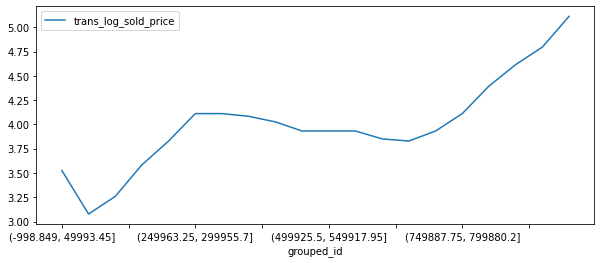

In [ ]:
temp_data =data.groupby("grouped_id").agg({"trans_log_sold_price":"median"}).plot(kind='line',figsize=(10,4))

plt.show()

In [ ]:
data["grouped_sold_price"]=pd.cut(data["sold_price"],[0,50,100,500,1000,float('Inf')],include_lowest=True)

In [ ]:
data["grouped_sold_price"].isnull().sum()

0

In [ ]:
data.shape

(1019646, 20)

# Train validation Test Split

Time Sensitive Train-validation-Test Split.

Why not CV : We have 10 lakh rows. We can afford to have seprate validation and test set. This will be a little faster to iterate among diiferent models.

The split will be time sensitive. 80% of data will be training set and will come from first 80% IDs and 10% will be validation data and will come from next 10% IDs and 10% will be test data and will come from last 10% IDs

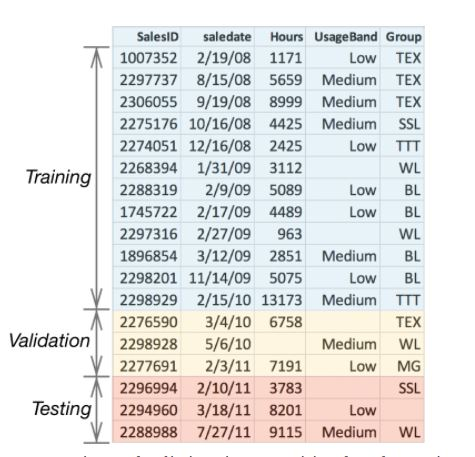

In [ ]:
data=pd.read_csv(path_data)
data=data.drop_duplicates()

In [ ]:
data=data[data["attr5"]!=3]

In [ ]:
data["attr5"] = data["attr5"].fillna(3.0)

In [ ]:
data["special_id_forsplit"]=(data["id"]-data["id"].min())/data["id"].max()

In [ ]:
data=data.sort_values("id")

In [ ]:
data_train=data[data["special_id_forsplit"]<0.8][["id","attr1","attr2","attr3","attr4","attr5","attr6","sold_price"]]

In [ ]:
data_val=data[(data["special_id_forsplit"]>0.8) & (data["special_id_forsplit"]<0.9)][["id","attr1","attr2","attr3","attr4","attr5","attr6","sold_price"]]

In [ ]:
data_test=data[data["special_id_forsplit"]>0.9][["id","attr1","attr2","attr3","attr4","attr5","attr6","sold_price"]]

In [ ]:
data_train.shape

(815701, 8)

In [ ]:
data_val.shape

(101975, 8)

In [ ]:
data_test.shape

(101968, 8)

With time number of orders in range for 100 to 500 have increased where as for rest of 0 to 50 they decreased

In [ ]:
pd.cut(data_train["sold_price"],[0,50,100,500,1000,float('Inf')],include_lowest=True).value_counts(normalize=True).sort_index()

(-0.001, 50.0]     0.521061
(50.0, 100.0]      0.059245
(100.0, 500.0]     0.341313
(500.0, 1000.0]    0.059208
(1000.0, inf]      0.019174
Name: sold_price, dtype: float64

In [ ]:
pd.cut(data_val["sold_price"],[0,50,100,500,1000,float('Inf')],include_lowest=True).value_counts(normalize=True).sort_index()

(-0.001, 50.0]     0.462015
(50.0, 100.0]      0.062957
(100.0, 500.0]     0.377887
(500.0, 1000.0]    0.072822
(1000.0, inf]      0.024320
Name: sold_price, dtype: float64

In [ ]:
pd.cut(data_test["sold_price"],[0,50,100,500,1000,float('Inf')],include_lowest=True).value_counts(normalize=True).sort_index()

(-0.001, 50.0]     0.377118
(50.0, 100.0]      0.063687
(100.0, 500.0]     0.443875
(500.0, 1000.0]    0.086027
(1000.0, inf]      0.029294
Name: sold_price, dtype: float64

How to Ensure good performance across sold_price interval as it may not perform well for groups haveing low examples?. We Can trey SMOTEN pakcage (for regression) or random oversampling. To properly gauge the performace that all groups are performing well. I will take unweighted Mean Absolute Error. (For training cost I will use OLS or MSE).

Unweighted MAE. I will first calculate MAE for different groups and take everage. This way even though a group representaion is low, it will have equal wiehtage like others.

# First Model Using Linear Regression.
Removed ID. Null values are treated using mean of respective varaibles only from training data. attr5 null has been made into new value as it is categorical.

In [ ]:
data_train['attr5']=data_train['attr5'].fillna(3.0)

In [ ]:
data_train['attr5'] = data_train['attr5'].astype('category')

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815701 entries, 871108 to 107492
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id          815701 non-null  int64   
 1   attr1       815701 non-null  int64   
 2   attr2       815701 non-null  int64   
 3   attr3       667787 non-null  float64 
 4   attr4       690921 non-null  float64 
 5   attr5       815701 non-null  category
 6   attr6       815701 non-null  float64 
 7   sold_price  815701 non-null  float64 
dtypes: category(1), float64(4), int64(3)
memory usage: 50.6 MB


In [ ]:
attr_3_mean=data_train["attr3"].mean()
attr_4_mean=data_train["attr4"].mean()
X = data_train.iloc[:,1:-1].fillna({'attr3':attr_3_mean,'attr4':attr_4_mean})

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815701 entries, 871108 to 107492
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   attr1   815701 non-null  int64   
 1   attr2   815701 non-null  int64   
 2   attr3   815701 non-null  float64 
 3   attr4   815701 non-null  float64 
 4   attr5   815701 non-null  category
 5   attr6   815701 non-null  float64 
dtypes: category(1), float64(3), int64(2)
memory usage: 38.1 MB


In [ ]:
y=data_train.iloc[:,-1]

In [ ]:
X=pd.concat([X,pd.get_dummies((X["attr5"]),drop_first=True,prefix='attr5')],axis=1).drop('attr5',axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815701 entries, 871108 to 107492
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   attr1      815701 non-null  int64  
 1   attr2      815701 non-null  int64  
 2   attr3      815701 non-null  float64
 3   attr4      815701 non-null  float64
 4   attr6      815701 non-null  float64
 5   attr5_2.0  815701 non-null  uint8  
 6   attr5_3.0  815701 non-null  uint8  
dtypes: float64(3), int64(2), uint8(2)
memory usage: 38.9 MB


Below I am trying diiferent models to improve r2 and to make sure assumptions of linear rrgression are not deviated too much.

In [ ]:
X = sm.add_constant(X)
mod = sm.OLS(y, X)
model_summary = mod.fit()
print(model_summary.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     744.3
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:31:14   Log-Likelihood:            -7.0508e+06
No. Observations:              815701   AIC:                         1.410e+07
Df Residuals:                  815693   BIC:                         1.410e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        193.1536     12.871     15.007      0.0

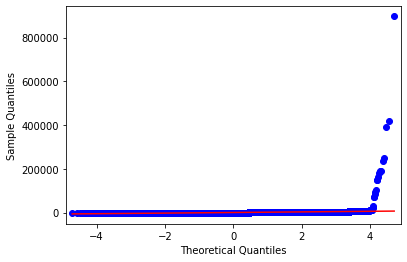

In [ ]:
res = model_summary.resid # residuals
fig = sm.qqplot(res,line='s')
plt.show()

using log transformation in y

In [ ]:
y=y.apply(lambda x:np.log(x+1))
mod = sm.OLS(y, X)
model_summary = mod.fit()
print(model_summary.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_price   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                 2.385e+04
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:31:17   Log-Likelihood:            -1.4950e+06
No. Observations:              815701   AIC:                         2.990e+06
Df Residuals:                  815693   BIC:                         2.990e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7227      0.014    262.572      0.0

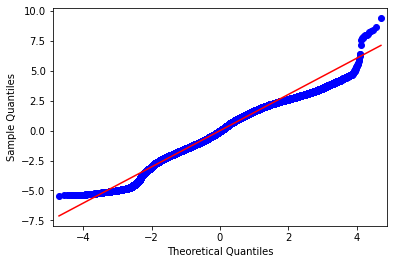

In [ ]:
res = model_summary.resid # residuals
fig = sm.qqplot(res,line='s')
plt.show()

attr6 has outliers impacting over fiited as evident from residual vs attr6 plot below. In next moel I will transform this varaible and test

<Figure size 1440x720 with 0 Axes>

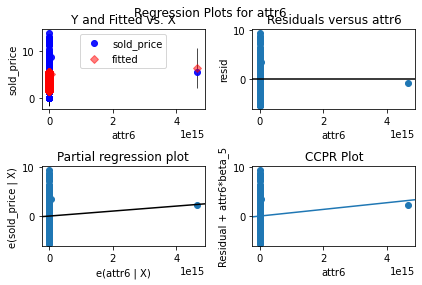

In [ ]:
fig = plt.figure(figsize=(20, 10))
sm.graphics.plot_regress_exog(model_summary, "attr6")
plt.show()

<Figure size 1440x720 with 0 Axes>

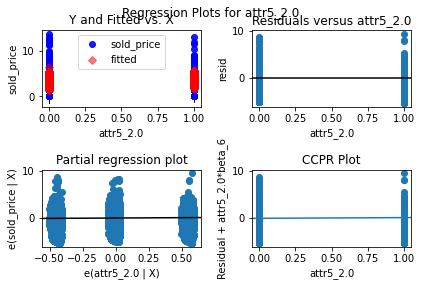

In [ ]:
fig = plt.figure(figsize=(20, 10))
sm.graphics.plot_regress_exog(model_summary, "attr5_2.0")
plt.show()

<Figure size 1440x720 with 0 Axes>

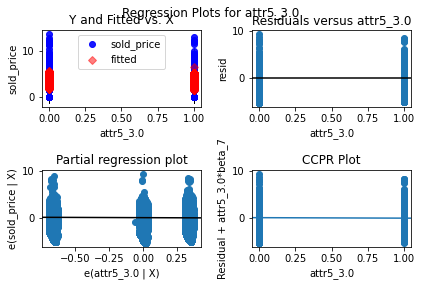

In [ ]:
fig = plt.figure(figsize=(20, 10))
sm.graphics.plot_regress_exog(model_summary, "attr5_3.0")
plt.show()

In [ ]:
X["attr6_log_grouped"] = pd.cut(X["attr6"].apply(lambda x:np.log(x+1)),[0,0.5,2,4,6,8,10,12,15,float('inf')])

In [ ]:
X["attr6_log_grouped"]=X["attr6_log_grouped"].cat.codes

In [ ]:
X["attr6_log_grouped"].value_counts()

 3    262442
 4    235508
-1    166707
 2    134342
 5     14643
 1      1260
 6       584
 7       189
 8        26
Name: attr6_log_grouped, dtype: int64

In [ ]:
X["attr6_log_grouped"]=X["attr6_log_grouped"]+1

In [ ]:
X["attr6_log_grouped"].value_counts()

4    262442
5    235508
0    166707
3    134342
6     14643
2      1260
7       584
8       189
9        26
Name: attr6_log_grouped, dtype: int64

In [ ]:
X=X.drop("attr6",axis=1)

After transformations and grouping model performance improved r2 increaded from 0.001 to 0.29. ALL other plots are inline with assuption though qq plot shows high diverngence beyond 2 & -2 thoeritical quntiles. This model might not perform well for too high and low values.

In [ ]:
mod = sm.OLS(y, X)
model_summary = mod.fit()
print(model_summary.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_price   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                 4.758e+04
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:32:33   Log-Likelihood:            -1.4313e+06
No. Observations:              815701   AIC:                         2.863e+06
Df Residuals:                  815693   BIC:                         2.863e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.8063      0.01

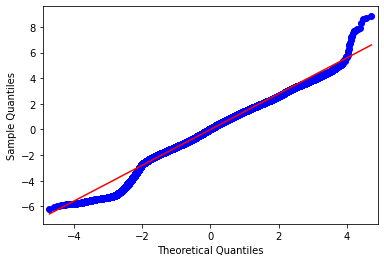

In [ ]:
res = model_summary.resid # residuals
fig = sm.qqplot(res,line='s')
plt.show()

<Figure size 1440x720 with 0 Axes>

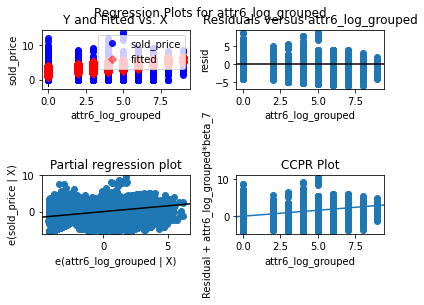

In [ ]:
fig = plt.figure(figsize=(20, 10))
sm.graphics.plot_regress_exog(model_summary, "attr6_log_grouped")
plt.show()

No muticolinearity. Only constant has high VIF which can be addressed by scaling the data set.

In [ ]:

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)


const                74.197585
attr1                 1.009906
attr2                 1.035826
attr3                 1.008622
attr4                 1.008271
attr5_2.0             1.424524
attr5_3.0             1.420310
attr6_log_grouped     1.039937
dtype: float64

<Figure size 1440x720 with 0 Axes>

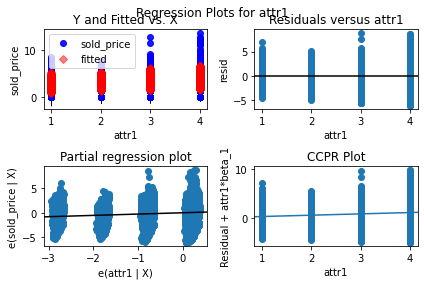

In [ ]:
fig = plt.figure(figsize=(20, 10))
sm.graphics.plot_regress_exog(model_summary, "attr1")
plt.show()

<Figure size 1440x720 with 0 Axes>

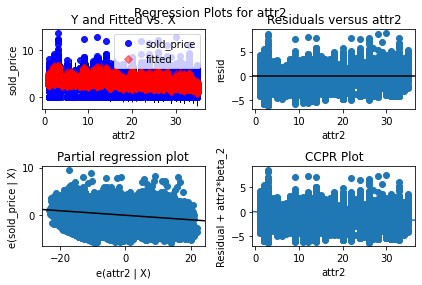

In [ ]:
fig = plt.figure(figsize=(20, 10))
sm.graphics.plot_regress_exog(model_summary, "attr2")
plt.show()

<Figure size 1440x720 with 0 Axes>

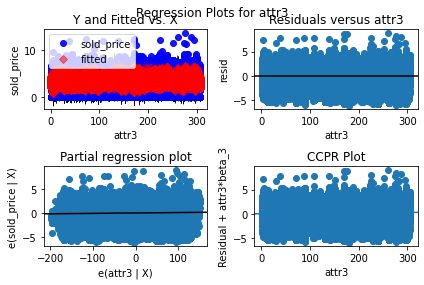

In [ ]:
fig = plt.figure(figsize=(20, 10))
sm.graphics.plot_regress_exog(model_summary, "attr3")
plt.show()

<Figure size 1440x720 with 0 Axes>

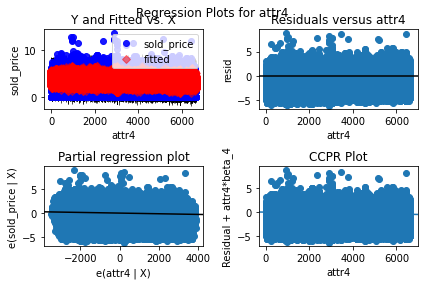

In [ ]:
fig = plt.figure(figsize=(20, 10))
sm.graphics.plot_regress_exog(model_summary, "attr4")
plt.show()

<Figure size 1440x720 with 0 Axes>

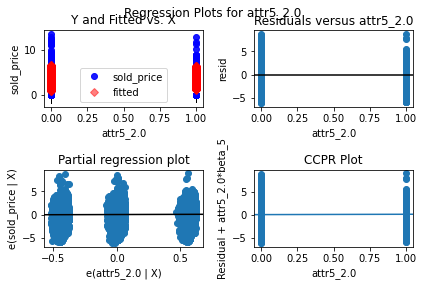

In [ ]:
fig = plt.figure(figsize=(20, 10))
sm.graphics.plot_regress_exog(model_summary, "attr5_2.0")
plt.show()

<Figure size 1440x720 with 0 Axes>

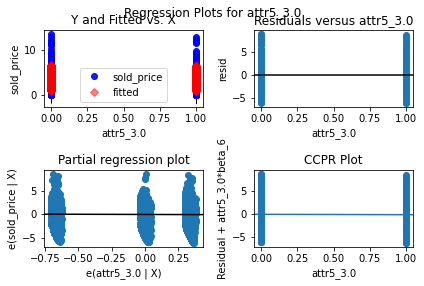

In [ ]:
fig = plt.figure(figsize=(20, 10))
sm.graphics.plot_regress_exog(model_summary, "attr5_3.0")
plt.show()

<Figure size 1440x720 with 0 Axes>

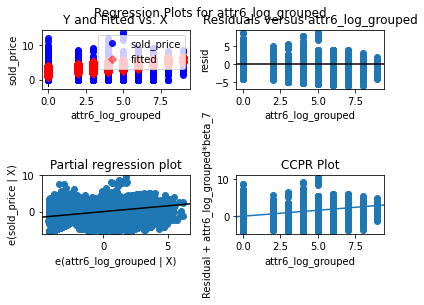

In [ ]:
fig = plt.figure(figsize=(20, 10))
sm.graphics.plot_regress_exog(model_summary, "attr6_log_grouped")
plt.show()

In [ ]:
model_fit = model_summary
model_cooks = model_fit.get_influence().cooks_distance[0]


In [ ]:
model_cooks

array([2.23985604e-07, 2.07544382e-08, 3.41064067e-08, ...,
       1.38943686e-08, 5.92201334e-07, 2.84052947e-06])

In [ ]:
min(model_cooks)

6.136660837348965e-18

In [ ]:
data_train["cook distance"]=model_cooks

As eveident from distribution log price and below cooks distam=nce there are some points that have very high sold price and they are outliers. The model with nor perform well for them.

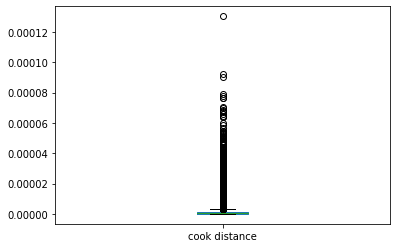

In [ ]:
data_train["cook distance"].plot(kind='box')

In [ ]:
np.log(897901.0	)

13.707815096218047

In [ ]:
np.quantile(np.log(data["sold_price"]+1),0.999)

8.160803920954665

In [ ]:
data["log_price"]=np.log(data["sold_price"]+1)

In [ ]:
data[data["log_price"]>8.16080392095466].shape

(1093, 11)

Checking the model after drooping values beyond 0.999 percentile

In [ ]:
data[data["id"].isin(list(data_train.sort_values("cook distance",ascending=False).id[0:300]))].sort_values("sold_price",ascending=False).head(10)

,id,attr1,attr2,attr3,attr4,attr5,attr6,title,sold_price,special_id_forsplit,log_price
364628,402604,4,3,277.0,2896.0,1.0,1860.0,louis vuitton flandrin monogram noir tote,897901.0,0.402663,13.707816
388897,338450,4,12,288.0,1026.0,3.0,1250.0,canada goose,419300.0,0.338500,12.946344
966535,666849,3,30,261.0,924.0,2.0,2500.0,nwt brunello cucinelli mens brown peak lapel suit,389350.0,0.666948,12.872237
577936,124639,4,9,NaN,5145.0,1.0,2000.0,st. john knit dress & jacket,236605.0,0.124657,12.374152
822194,484763,4,3,295.0,2896.0,1.0,800.0,lv monogram wallet,188685.0,0.484835,12.147840
343944,238001,4,26,225.0,982.0,3.0,695.0,chanel sandals,188685.0,0.238036,12.147840
783237,479462,4,3,NaN,6423.0,3.0,0.0,henri bendel bag,164725.0,0.479533,12.012039
853372,240950,4,22,38.0,2376.0,2.0,395.0,jesse kamm sailor pants,149750.0,0.240985,11.916729
1022803,557570,3,24,274.0,3760.0,2.0,375.0,off white t shirt size large new with tags,95840.0,0.557653,11.470446
189811,389773,4,33,88.0,NaN,1.0,250.0,for love and lemons anabelle eyelet crop top,71880.0,0.389830,11.182767


In [ ]:
data_train = data_train.drop("cook distance",axis=1)

In [ ]:
data_check=pd.concat([X,y],axis=1)

In [ ]:
data_check = data_check[data_check["sold_price"]<8.16]

In [ ]:
X_new=data_check.iloc[:,:-1]

In [ ]:

y_new=data_check.iloc[:,-1]

In [ ]:
mod = sm.OLS(y_new, X_new)
model_summary = mod.fit()
print(model_summary.summary())

                            OLS Regression Results                            
Dep. Variable:             sold_price   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                 4.734e+04
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:35:55   Log-Likelihood:            -1.4276e+06
No. Observations:              814839   AIC:                         2.855e+06
Df Residuals:                  814831   BIC:                         2.855e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.7999      0.01

In [ ]:
model_fit = model_summary
model_cooks = model_fit.get_influence().cooks_distance[0]

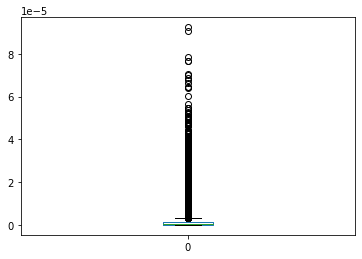

In [ ]:
pd.DataFrame(model_cooks).plot(kind='box')

In [ ]:
## qqplot is also very weell behaved now

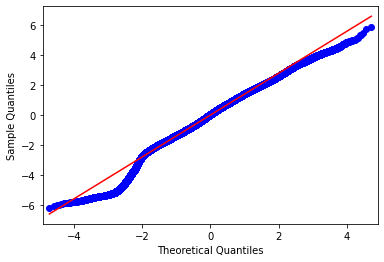

In [ ]:
res = model_summary.resid # residuals
fig = sm.qqplot(res,line='s')
plt.show()

Steps should be follwed for linear regression

1. Y/sold_price tranformation
2. ID removal
3. attr6 transformation and grouping
4. attr5 one hot encoding
6. attr3&attr4 mean value impuation

In [ ]:
data["group_id"]=pd.cut(data["id"],10)

In [ ]:
data.groupby("group_id").agg({"attr4":"mean"}).sort_index()

,attr4
group_id,
"(-998.849, 99985.9]",2995.718011
"(99985.9, 199970.8]",3044.661110
"(199970.8, 299955.7]",3056.330574
"(299955.7, 399940.6]",3035.056349
"(399940.6, 499925.5]",3040.979801
"(499925.5, 599910.4]",3054.786142
"(599910.4, 699895.3]",3052.143058
"(699895.3, 799880.2]",3031.867111
"(799880.2, 899865.1]",2991.836211


In [ ]:
data.groupby("group_id").agg({"attr3":"mean"}).sort_index()

,attr3
group_id,
"(-998.849, 99985.9]",169.129315
"(99985.9, 199970.8]",170.122008
"(199970.8, 299955.7]",170.469364
"(299955.7, 399940.6]",170.711311
"(399940.6, 499925.5]",170.609594
"(499925.5, 599910.4]",171.179314
"(599910.4, 699895.3]",171.169149
"(699895.3, 799880.2]",170.953673
"(799880.2, 899865.1]",170.429081


# Final Linear regression model using pipeline

In [ ]:
data_train.columns

Index(['id', 'attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6',
       'sold_price'],
      dtype='object')

In [ ]:
if('cook distance' in data_train.columns):
    data_train=data_train.drop('cook distance',axis=1)

In [ ]:
class lm_x_transform(BaseEstimator, TransformerMixin):
        
    def transform(self, X,y=None,**transform_params):
        X=X.copy()
        if('id' in X.columns):
          X=X.drop('id',axis=1)
        
        X["attr6"] = pd.cut(X["attr6"].apply(lambda x:np.log(x+1)),[0,0.5,2,4,6,8,10,12,15,float('inf')])
        X["attr6"]=X["attr6"].cat.codes
        
        X=pd.concat([X,pd.get_dummies((X["attr5"]),drop_first=True,prefix='attr5')],axis=1).drop('attr5',axis=1)
        X=X.fillna({'attr3':self.attr3_mean,'attr4':self.attr4_mean})
        
        
        return X

    def fit(self, X, y=None, **fit_params):
        self.attr3_mean=X['attr3'].mean()
        self.attr4_mean=X['attr4'].mean()
        return self

In [ ]:
lm_pipeline = Pipeline( steps = [('x_tranform',lm_x_transform())] )

In [ ]:
X_train = lm_pipeline.fit_transform(X=data_train.iloc[:,:-1])


In [ ]:
lm_model=LinearRegression()

In [ ]:
model=lm_model.fit(X_train,data_train.iloc[:,-1].apply(lambda x:np.log(x+1)))

In [ ]:
y_train_pred=model.predict(X_train)

In [ ]:
model.score(X_train,data_train.iloc[:,-1].apply(lambda x:np.log(x+1)))

0.2899438800134131

In [ ]:
mean_absolute_error(np.exp(y_train_pred),data_train.iloc[:,-1])

142.48238411737995

In [ ]:
mean_absolute_error( np.exp(model.predict(lm_pipeline.transform(data_val.iloc[:,:-1])))   ,data_val.iloc[:,-1])

169.68102047823814

In [ ]:
mean_absolute_error( np.exp(model.predict(lm_pipeline.transform(data_test.iloc[:,:-1])))   ,data_test.iloc[:,-1])

193.07267047517286

In [ ]:
def mae(x1):
    x1=x1.loc[np.isfinite(x1["preds"]),:]
    mae = mean_absolute_error(x1["preds"],x1["sold_price"])
    return mae

def mae_scaled(x1):
    x1=x1.loc[np.isfinite(x1["preds"]),:]
    mae = mean_absolute_error(x1["preds"],x1["sold_price"])
    return mae/np.median(x1["sold_price"])


def getErrorByGroups(model,data,pipeline1):
   data=data.copy()
   X11=pipeline1.transform(X=data.iloc[:,:-1])
   data["groups"] = pd.cut(data["sold_price"],[0,50,100,500,1000,float('Inf')],include_lowest=True)

   


   data["preds"]=np.exp(model.predict(X11))
   return data.groupby("groups").apply(mae)

def getErrorByGroups_scaled(model,data,pipeline1):
   data=data.copy()
   X11=pipeline1.transform(X=data.iloc[:,:-1])
   data["groups"] = pd.cut(data["sold_price"],[0,50,100,500,1000,float('Inf')],include_lowest=True)

   


   data["preds"]=np.exp(model.predict(X11))
   return data.groupby("groups").apply(mae_scaled)


def getErrorByGroups_median(model,data,pipeline1):
   data=data.copy()
   X11=pipeline1.transform(X=data.iloc[:,:-1])
   data["groups"] = pd.cut(data["sold_price"],[0,50,100,500,1000,float('Inf')],include_lowest=True)

   data["preds"]=np.exp(model.predict(X11))
   return data.groupby("groups").apply(mae_median)

def mae_median(x1):
    x1=x1.loc[np.isfinite(x1["preds"]),:]
    mae = median_absolute_error(x1["preds"],x1["sold_price"])
    return mae

def getDF(model,data,pipeline1):
   data=data.copy()
   X11=pipeline1.transform(data.iloc[:,:-1])
   data["groups"] = pd.cut(data["sold_price"],[0,50,100,500,1000,float('Inf')],include_lowest=True)

  


   data["preds"]=np.exp(model.predict(X11))
   return data

def nonweighted_mar_linear(model,data,pipeline1):
    data=data.copy()
    X11=pipeline1.transform(X=data.iloc[:,:-1])
    data["groups"] = pd.cut(data["sold_price"],[0,50,100,500,1000,float('Inf')],include_lowest=True)

    


    data["preds"]=np.exp(model.predict(X11))
    return np.mean(data.groupby("groups").apply(mae))



In [ ]:
getErrorByGroups(model=model,data=data_train,pipeline1=lm_pipeline)

groups
(-0.001, 50.0]       34.159174
(50.0, 100.0]        43.727383
(100.0, 500.0]      163.341847
(500.0, 1000.0]     546.514494
(1000.0, inf]      1772.434523
dtype: float64

In [ ]:
getErrorByGroups(model=model,data=data_val,pipeline1=lm_pipeline)

groups
(-0.001, 50.0]       32.659840
(50.0, 100.0]        43.000907
(100.0, 500.0]      175.048081
(500.0, 1000.0]     547.439321
(1000.0, inf]      1886.152559
dtype: float64

In [ ]:
getErrorByGroups(model=model,data=data_test,pipeline1=lm_pipeline)

groups
(-0.001, 50.0]       34.514900
(50.0, 100.0]        43.080374
(100.0, 500.0]      175.434974
(500.0, 1000.0]     545.362487
(1000.0, inf]      1793.087397
dtype: float64

Above we see it desnt perform well on last one and this beacuse of precence of ouliers. Lets check median absolute error which is not impacted by some outlying values and shows how 50% of predictions are behaving in each group

In [ ]:
getErrorByGroups_median(model=model,data=data_train,pipeline1=lm_pipeline)

groups
(-0.001, 50.0]       21.813536
(50.0, 100.0]        40.817915
(100.0, 500.0]      147.135064
(500.0, 1000.0]     527.176070
(1000.0, inf]      1242.700470
dtype: float64

In [ ]:
getErrorByGroups_median(model=model,data=data_val,pipeline1=lm_pipeline)

groups
(-0.001, 50.0]       20.171883
(50.0, 100.0]        40.770060
(100.0, 500.0]      167.347036
(500.0, 1000.0]     527.501267
(1000.0, inf]      1206.058256
dtype: float64

In [ ]:
getErrorByGroups_median(model=model,data=data_test,pipeline1=lm_pipeline)

groups
(-0.001, 50.0]       21.296330
(50.0, 100.0]        40.421118
(100.0, 500.0]      168.589827
(500.0, 1000.0]     523.123468
(1000.0, inf]      1204.599915
dtype: float64

In [ ]:
nonweighted_mar_linear(model=model,data=data_train,pipeline1=lm_pipeline)

512.0354840411595

In [ ]:
nonweighted_mar_linear(model=model,data=data_val,pipeline1=lm_pipeline)

536.8601415216328

In [ ]:
nonweighted_mar_linear(model=model,data=data_test,pipeline1=lm_pipeline)

518.2960265587535

In [ ]:
getErrorByGroups_scaled(model=model,data=data_train,pipeline1=lm_pipeline)

groups
(-0.001, 50.0]     2.439941
(50.0, 100.0]      0.485860
(100.0, 500.0]     0.604970
(500.0, 1000.0]    0.815693
(1000.0, inf]      1.265130
dtype: float64

In [ ]:
getErrorByGroups_scaled(model=model,data=data_val,pipeline1=lm_pipeline)

groups
(-0.001, 50.0]     2.177323
(50.0, 100.0]      0.505893
(100.0, 500.0]     0.625172
(500.0, 1000.0]    0.811021
(1000.0, inf]      1.347252
dtype: float64

In [ ]:
getErrorByGroups_scaled(model=model,data=data_test,pipeline1=lm_pipeline)

groups
(-0.001, 50.0]     2.157181
(50.0, 100.0]      0.506828
(100.0, 500.0]     0.626553
(500.0, 1000.0]    0.807944
(1000.0, inf]      1.280777
dtype: float64

Lets remove the outliers above 0.999 quantile only from TRAINING DATA and check performance

In [ ]:
lm_pipeline = Pipeline( steps = [('x_tranform',lm_x_transform())] )

In [ ]:
np.exp(8.16080392095466)

3500.999999999979

In [ ]:
X_train = lm_pipeline.fit_transform(X=data_train[data_train["sold_price"]<3500].iloc[:,:-1])


In [ ]:
lm_model=LinearRegression()

In [ ]:
model=lm_model.fit(X_train,data_train[data_train["sold_price"]<3500].iloc[:,-1].apply(lambda x:np.log(x+1)))

In [ ]:
y_train_pred=model.predict(X_train)

In [ ]:
model.score(X_train,data_train[data_train["sold_price"]<3500].iloc[:,-1].apply(lambda x:np.log(x+1)))

0.2891260832686614

In [ ]:
mean_absolute_error(np.exp(y_train_pred),data_train[data_train["sold_price"]<3500].iloc[:,-1])

133.72911680451213

In [ ]:
mean_absolute_error( np.exp(model.predict(lm_pipeline.transform(data_val.iloc[:,:-1])))   ,data_val.iloc[:,-1])

169.94446636911678

In [ ]:
mean_absolute_error( np.exp(model.predict(lm_pipeline.transform(data_test.iloc[:,:-1])))   ,data_test.iloc[:,-1])

193.41477571844524

In [ ]:
getErrorByGroups(model=model,data=data_train,pipeline1=lm_pipeline)

groups
(-0.001, 50.0]       33.965677
(50.0, 100.0]        43.398677
(100.0, 500.0]      163.884328
(500.0, 1000.0]     547.819385
(1000.0, inf]      1774.205422
dtype: float64

In [ ]:
getErrorByGroups(model=model,data=data_val,pipeline1=lm_pipeline)

groups
(-0.001, 50.0]       32.468494
(50.0, 100.0]        42.730762
(100.0, 500.0]      175.649899
(500.0, 1000.0]     548.779865
(1000.0, inf]      1887.954323
dtype: float64

In [ ]:
getErrorByGroups(model=model,data=data_test,pipeline1=lm_pipeline)

groups
(-0.001, 50.0]       34.307352
(50.0, 100.0]        42.815323
(100.0, 500.0]      176.042026
(500.0, 1000.0]     546.709990
(1000.0, inf]      1794.858405
dtype: float64

Even after removing some high END values the model doesnt improve and does I will keep those value. In order make this model more robust we should explore getting brand name and other information from title varaible. which helps in checking which are some high end products that are impacting

In [ ]:
def mae(x1):
    x1=x1.loc[np.isfinite(x1["preds"]),:]
    mae = mean_absolute_error(x1["preds"],x1["sold_price"])
    return mae


def NonWeightedMAE(model,data,pipeline1):
    data=data.copy()
    X11=pipeline1.transform(X=data.iloc[:,:-1])
    data["groups"] = pd.cut(data["sold_price"],[0,50,100,500,1000,float('Inf')],include_lowest=True)

    data["preds"]=np.exp(model.predict(X11))
    return np.mean(data.groupby("groups").apply(mae))

In [ ]:
NonWeightedMAE(model=model,data=data_train,pipeline1=lm_pipeline)

512.6546976953489

In [ ]:
NonWeightedMAE(model=model,data=data_val,pipeline1=lm_pipeline)

537.5166686007803

In [ ]:
NonWeightedMAE(model=model,data=data_test,pipeline1=lm_pipeline)

518.9466191192607

As there is differnce between train and test I will go ahead and experminet with elastic net regression. But There is no improvement

In [ ]:
from sklearn.model_selection import ParameterGrid

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
param_grid ={'alpha': [0.00001,0.0001,0.001,0.01,0.1,0.3],
             'l1_ratio':[0.1,0.25,0.5,0.75,0.9]}

lm_pipeline = Pipeline( steps = [('x_tranform',lm_x_transform())] )
X_train = lm_pipeline.fit_transform(X=data_train.iloc[:,:-1])

errors=[]
for params in list(ParameterGrid(param_grid)):
    model=ElasticNet(alpha=params['alpha'],l1_ratio=params['l1_ratio'])
    model=model.fit(X_train,data_train.iloc[:,-1].apply(lambda x:np.log(x+1)))
    error=NonWeightedMAE(model=model,data=data_val,pipeline1=lm_pipeline)
    error_stub=params
    error_stub.update({'error':error})
    errors.append(error_stub)
    print(error_stub)


{'alpha': 1e-05, 'l1_ratio': 0.1, 'error': 536.8603479007941}
{'alpha': 1e-05, 'l1_ratio': 0.25, 'error': 536.8603992272504}
{'alpha': 1e-05, 'l1_ratio': 0.5, 'error': 536.860485081491}
{'alpha': 1e-05, 'l1_ratio': 0.75, 'error': 536.8605706198028}
{'alpha': 1e-05, 'l1_ratio': 0.9, 'error': 536.8606219412278}
{'alpha': 0.0001, 'l1_ratio': 0.1, 'error': 536.8622042362013}
{'alpha': 0.0001, 'l1_ratio': 0.25, 'error': 536.862718477196}
{'alpha': 0.0001, 'l1_ratio': 0.5, 'error': 536.8635771160987}
{'alpha': 0.0001, 'l1_ratio': 0.75, 'error': 536.8644318521314}
{'alpha': 0.0001, 'l1_ratio': 0.9, 'error': 536.8649445439845}
{'alpha': 0.001, 'l1_ratio': 0.1, 'error': 536.8807467719989}
{'alpha': 0.001, 'l1_ratio': 0.25, 'error': 536.8858815548359}
{'alpha': 0.001, 'l1_ratio': 0.5, 'error': 536.89444142658}
{'alpha': 0.001, 'l1_ratio': 0.75, 'error': 536.9029397999324}
{'alpha': 0.001, 'l1_ratio': 0.9, 'error': 536.9080309492805}
{'alpha': 0.01, 'l1_ratio': 0.1, 'error': 537.0643379727986}
{'

## Model 2 : Random Forest 

As there are outliers in Data. I am using Randomforrest to further improve the score



Below function calculates non weighted version of MAE for different groups for random forrest

Missing value in attr3 and attr4 are converted to -1

In [ ]:
data_train=data_train.fillna({'attr3':-1,'attr4':-1})

In [ ]:
data_train.columns

Index(['id', 'attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6',
       'sold_price'],
      dtype='object')

In [ ]:
data_val=data_val.fillna({'attr3':-1,'attr4':-1})

In [ ]:
data_test=data_test.fillna({'attr3':-1,'attr4':-1})

In [ ]:
def mae2(x1):
    x1=x1.loc[np.isfinite(x1["preds"]),:]
    mae = mean_absolute_error(x1["preds"],x1["sold_price"])
    return mae


def getErrorByGroups2(model,data):
   data=data.copy()
   #X11=pipeline1.transform(X=data.iloc[:,:-1])
   
   data["preds"]=model.predict(data.iloc[:,:-1])
   data["groups"] = pd.cut(data["sold_price"],[0,50,100,500,1000,float('Inf')],include_lowest=True)
   return np.mean(data.groupby("groups").apply(mae2))

below function help in gauging performance of over differnt groups using thir respective MAE values

In [ ]:
def mae(x1):
    x1=x1.loc[np.isfinite(x1["preds"]),:]
    mae = median_absolute_error(x1["preds"],x1["sold_price"])
    return mae


def getErrorByGroups(model,data):
   data=data.copy()
   #X11=pipeline1.transform(X=data.iloc[:,:-1])
   
   data["preds"]=model.predict(data.iloc[:,:-1])
   data["groups"] = pd.cut(data["sold_price"],[0,50,100,500,1000,float('Inf')],include_lowest=True)
   return data.groupby("groups").apply(mae)

  


Below function checked the scaled MAE for different groups. as getting MAE 20 for group 1000+ is much better for getting MAE of 20 for group 50. So just to check I am scaling MAE to median sold price of that group

In [ ]:
if('id' in data_train.columns):
   data_train=data_train.drop('id',axis=1)

if('id' in data_val.columns):
   data_val=data_val.drop('id',axis=1)

if('id' in data_test.columns):
   data_test=data_test.drop('id',axis=1)

In [ ]:
def mae_scaled(x1):
    x1=x1.loc[np.isfinite(x1["preds"]),:]
    mae = median_absolute_error(x1["preds"],x1["sold_price"])
    return mae/np.median(x1["sold_price"])


def getErrorByGroups_scaled(model,data):
   data=data.copy()
   #X11=pipeline1.transform(X=data.iloc[:,:-1])
   
   data["preds"]=model.predict(data.iloc[:,:-1])
   data["groups"] = pd.cut(data["sold_price"],[0,50,100,500,1000,float('Inf')],include_lowest=True)
   return data.groupby("groups").apply(mae_scaled)

In [ ]:
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
# Train the model on training data
rf.fit(data_train.iloc[:,:-1],data_train.iloc[:,-1])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Its performing better than linear regression and In next sets I will tune it

In [ ]:
getErrorByGroups2(model=rf,data=data_train)

325.545427677968

In [ ]:
getErrorByGroups2(model=rf,data=data_val)

349.918474323283

In [ ]:
param_grid ={'bootstrap': [True, False],
 'max_depth': [5,10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4, 6],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10,25,50]}

Hyperparamter tuning will take 2 hours.

In [ ]:
errors=[]
for params in list(ParameterGrid(param_grid)):
  xf_model = rf = RandomForestRegressor(n_estimators = params['n_estimators'], bootstrap=params['bootstrap'],max_depth=params['max_depth'],max_features=params['max_features'],min_samples_leaf=params['min_samples_leaf'],min_samples_split=params['min_samples_split'],n_jobs=4)
  print(xf_model)
  xf_model=xf_model.fit(data_train.iloc[:,:-1],data_train.iloc[:,-1]+1)
  error = getErrorByGroups2(model=xf_model,data=data_val)
  error_stub=params
  error_stub.update({'error':error})
  errors.append(error_stub)
  print(error_stub)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10, 'error': 350.4685261358876}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
 

KeyboardInterrupt: ignored

In [ ]:
hyper_param = pd.DataFrame(errors)

In [ ]:
hyper_param.sort_values("error",ascending=True).iloc[0]

In [ ]:
best_model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
# Train the model on training data
best_model.fit(data_train.iloc[:,:-1],data_train.iloc[:,-1])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Best Model test performance. As you can see it performs well as compared to linear regression model. non weighted MAE is down from 500s to 280s

In [ ]:
getErrorByGroups2(model=best_model,data=data_train)

236.84645208602146

In [ ]:
getErrorByGroups2(model=best_model,data=data_val)

300.09367318899905

In [ ]:
getErrorByGroups2(model=best_model,data=data_test)

288.2765817920568

In [ ]:
getErrorByGroups(model=best_model,data=data_train)

groups
(-0.001, 50.0]       4.753418
(50.0, 100.0]       24.695352
(100.0, 500.0]      50.783861
(500.0, 1000.0]    158.822957
(1000.0, inf]      484.435218
dtype: float64

In [ ]:
getErrorByGroups(model=best_model,data=data_val)

groups
(-0.001, 50.0]       6.531377
(50.0, 100.0]       30.205446
(100.0, 500.0]      64.427663
(500.0, 1000.0]    180.668618
(1000.0, inf]      526.165475
dtype: float64

In [ ]:
getErrorByGroups(model=best_model,data=data_test)

groups
(-0.001, 50.0]       7.105719
(50.0, 100.0]       29.614979
(100.0, 500.0]      63.699533
(500.0, 1000.0]    183.982201
(1000.0, inf]      541.684817
dtype: float64

Model performance of Random Forest Increased considerably. Looking at scaled version of MAE and comparing it with linear regression , RF is much better

In [ ]:
getErrorByGroups_scaled(model=best_model,data=data_train)

groups
(-0.001, 50.0]     0.339530
(50.0, 100.0]      0.274393
(100.0, 500.0]     0.188088
(500.0, 1000.0]    0.237049
(1000.0, inf]      0.345781
dtype: float64

In [ ]:
getErrorByGroups_scaled(model=best_model,data=data_val)

groups
(-0.001, 50.0]     0.435425
(50.0, 100.0]      0.355358
(100.0, 500.0]     0.230099
(500.0, 1000.0]    0.267657
(1000.0, inf]      0.375832
dtype: float64

In [ ]:
getErrorByGroups_scaled(model=best_model,data=data_test)

groups
(-0.001, 50.0]     0.444107
(50.0, 100.0]      0.348412
(100.0, 500.0]     0.227498
(500.0, 1000.0]    0.272566
(1000.0, inf]      0.386918
dtype: float64

# **Best Model trained on full data**

In [ ]:
data.isnull().sum()

id                          0
attr1                       0
attr2                       0
attr3                  184945
attr4                  163773
attr5                       0
attr6                       0
title                      89
sold_price                  0
special_id_forsplit         0
log_price                   0
group_id                    0
dtype: int64

In [ ]:
data.columns

Index(['id', 'attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'title',
       'sold_price', 'special_id_forsplit', 'log_price', 'group_id'],
      dtype='object')

In [ ]:
data_sel=data[['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6','sold_price']]

In [ ]:
data_sel['attr5']=data_sel['attr5'].fillna(3.0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_sel['attr5'] = data_sel['attr5'].astype('category')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_sel=data_sel.fillna({'attr3':-1,'attr4':-1})

In [ ]:
best_model.fit(data_sel.iloc[:,:-1],data_sel.iloc[:,-1])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
getErrorByGroups2(model=best_model,data=data_sel)

243.21099563158845

# Vectorized Code for getting importance of ith feature for particular obs

> Indented block



In [ ]:
def getFeatureImportance(i,m,x_instance_number,x_whole,model=None):
    
    feat_size=x_whole.shape[1]
    
    mask=np.random.randint(low=0, high=2, size=(m,feat_size))
            
    b1_mask=np.copy(mask)
    b2_mask=np.copy(mask)
    
    
    b1_mask[:,i-1]=1
    b2_mask[:,i-1]=0
        
    b1_mask_neg=np.where(b1_mask>0.5,0,1)
    
    b2_mask_neg=np.where(b2_mask>0.5,0,1)
    
    choices=np.random.choice(np.concatenate([np.arange(0,x_instance_number),np.arange(1+x_instance_number,x_whole.shape[0])],axis=0),m,replace=False)
    x_instance=x_whole[x_instance_number,:]
    x_whole2=x_whole[choices,:]
    
    
    
    b1=b1_mask * x_instance + b1_mask_neg * x_whole2
    b2=b2_mask * x_instance + b2_mask_neg * x_whole2
    
    
    
    
    importance=model.predict(b1)-model.predict(b2)
    
    
    
    importance=np.sum(importance)
    
    importance=importance/m
    
    return importance

In [ ]:
data.columns

Index(['id', 'attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'title',
       'sold_price', 'special_id_forsplit', 'log_price', 'group_id'],
      dtype='object')

In [ ]:
data_sel['id']=data['id']

In [ ]:
feature_names= data_sel.iloc[:,:-2].columns
feat_size=len(feature_names)

In [ ]:
feature_names

Index(['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6'], dtype='object')

In [ ]:
data_sel

,attr1,attr2,attr3,attr4,attr5,attr6,sold_price,id
871108,4,9,-1.0,-1.0,3.0,1000.0,350.0,1
125952,4,2,24.0,-1.0,3.0,380.0,100.0,2
940965,4,3,-1.0,-1.0,3.0,495.0,250.0,3
483010,4,3,-1.0,-1.0,3.0,2300.0,650.0,4
218425,4,26,-1.0,1996.0,3.0,700.0,125.0,5
...,...,...,...,...,...,...,...,...
305304,4,3,89.0,2896.0,3.0,1300.0,1100.0,999846
730825,3,24,267.0,-1.0,2.0,0.0,315.0,999847
171449,4,13,119.0,-1.0,2.0,265.0,40.0,999848
208905,3,12,216.0,-1.0,2.0,1095.0,600.0,999849


In [ ]:
x_whole_data=data_sel.iloc[:,:-2].values

In [ ]:
feature_importances=[]
for id in np.arange(1,101):
    for i,name in zip(range(feat_size),feature_names):
        importance = getFeatureImportance(i,30,id,x_whole_data,model=best_model)
        feature_importances.append({'id':id,'feature':name,'importance':importance})

In [ ]:
feature_importances

[{'feature': 'attr1', 'id': 1, 'importance': 67.65918126475738},
 {'feature': 'attr2', 'id': 1, 'importance': -4.274719034056123},
 {'feature': 'attr3', 'id': 1, 'importance': 8.650508368280809},
 {'feature': 'attr4', 'id': 1, 'importance': 3.793423815960199},
 {'feature': 'attr5', 'id': 1, 'importance': 2.373045002517375},
 {'feature': 'attr6', 'id': 1, 'importance': -392.11008431693693},
 {'feature': 'attr1', 'id': 2, 'importance': -14.059054392298334},
 {'feature': 'attr2', 'id': 2, 'importance': -5.002433737732867},
 {'feature': 'attr3', 'id': 2, 'importance': 6.76713100012478},
 {'feature': 'attr4', 'id': 2, 'importance': -0.24923721809483132},
 {'feature': 'attr5', 'id': 2, 'importance': 12.796110819851425},
 {'feature': 'attr6', 'id': 2, 'importance': -13.620885743170762},
 {'feature': 'attr1', 'id': 3, 'importance': 570.4039490002724},
 {'feature': 'attr2', 'id': 3, 'importance': -2.491876595650896},
 {'feature': 'attr3', 'id': 3, 'importance': 126.95517685074628},
 {'feature':